### Problem Statement

CarIns is a startup that provides insurance for cars. It is one of the best car insurance brands known for the highest claim settlement ratio. It was launched back in Oct 2020 and acquired its initial policyholders by providing a hassle-free claim process, instant policy issuance, and claim settlements at minimum coverages.

As it's a fast growing startup, **the company would like to optimize the cost of the insurance by identifying the policyholders who are more likely to claim in the next 6 months.** 

Now the company would like to use Data Science to identify the policyholders whose chances of filing a claim are high in the next 6 months. The company challenges the Data Science community to build a high-performance algorithm to predict if the policyholder will file a claim in the next 6 months or not based on the set of car and policy features.

### About the Dataset

You are provided with information on policyholders containing the attributes like policy tenure, age of the car, age of the car owner, population density of the city, make and model of the car, power, engine type, etc and the target variable indicating whether the policyholder files a claim in the next 6 months or not.

https://datahack.analyticsvidhya.com/contest/dataverse/#ProblemStatement

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 100)
plt.rcParams['figure.figsize'] = [25, 15]

In [2]:
train = pd.read_csv("~/Downloads/train_qWM28Yl.csv")
test = pd.read_csv("~/Downloads/test_zo1G9sv.csv")

In [3]:
train.shape, test.shape

((58592, 44), (39063, 43))

In [4]:
# combine the data
combined = pd.concat([train, test], ignore_index = True)
combined.shape

(97655, 44)

In [5]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0


In [6]:
# Curate the List of Cat Variables

combined.select_dtypes(include = "object").columns

Index(['policy_id', 'area_cluster', 'segment', 'model', 'fuel_type',
       'max_torque', 'max_power', 'engine_type', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'rear_brakes_type', 'transmission_type',
       'steering_type', 'is_front_fog_lights', 'is_rear_window_wiper',
       'is_rear_window_washer', 'is_rear_window_defogger', 'is_brake_assist',
       'is_power_door_locks', 'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert'],
      dtype='object')

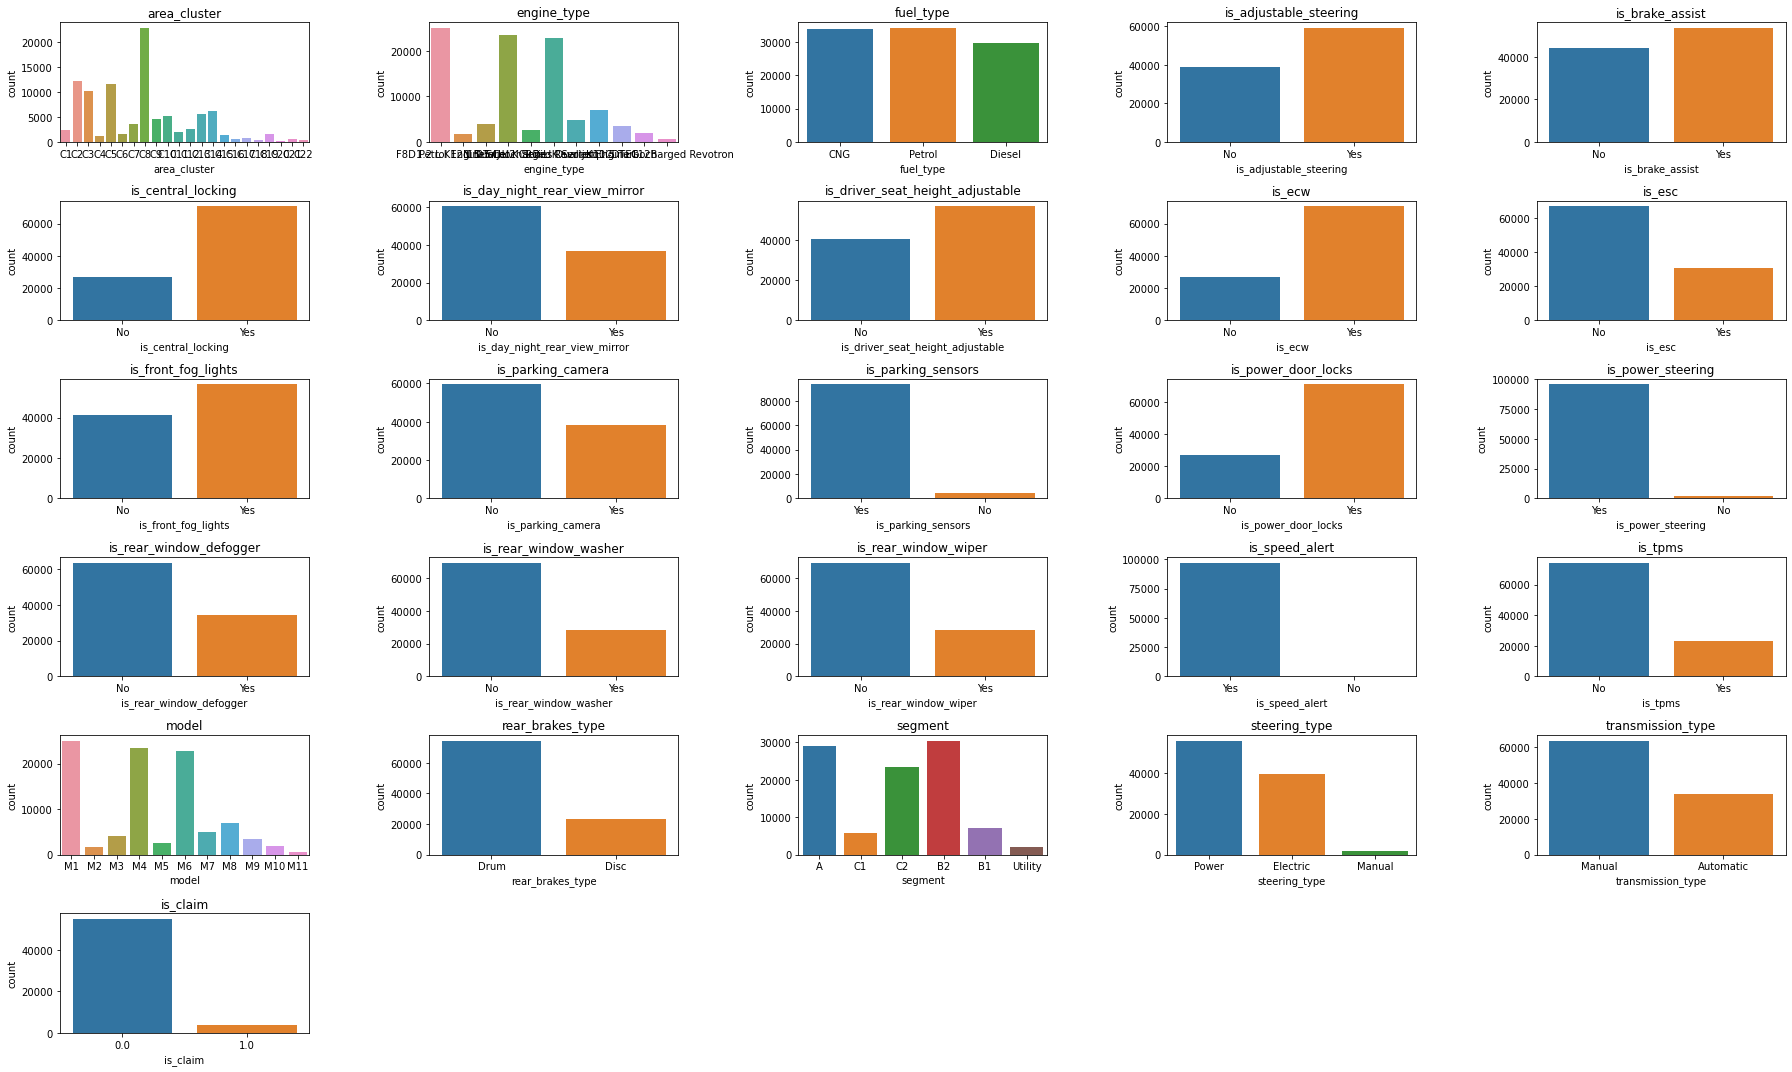

In [7]:
cat_cols = ['area_cluster', 'engine_type', 'fuel_type', 'is_adjustable_steering',
       'is_brake_assist', 'is_central_locking',
       'is_day_night_rear_view_mirror', 'is_driver_seat_height_adjustable',
       'is_ecw', 'is_esc', 'is_front_fog_lights', 'is_parking_camera',
       'is_parking_sensors', 'is_power_door_locks', 'is_power_steering',
       'is_rear_window_defogger', 'is_rear_window_washer',
       'is_rear_window_wiper', 'is_speed_alert', 'is_tpms', 'model', 'rear_brakes_type', 'segment',
       'steering_type', 'transmission_type', "is_claim"]

nrows = 6
ncols = 5
repeater = 1

for i in cat_cols:
    plt.subplot(nrows, ncols, repeater)
    sns.countplot(combined.loc[:, i])
    plt.title(i)
    repeater+=1
plt.tight_layout()
plt.show()

# Steering Type=Yes, Brake Assist is given,
# Central Locking is available & Driver Seat Height is Adj
# Doors have power, ecw is there...
# Tgt variable is highly imbalanced

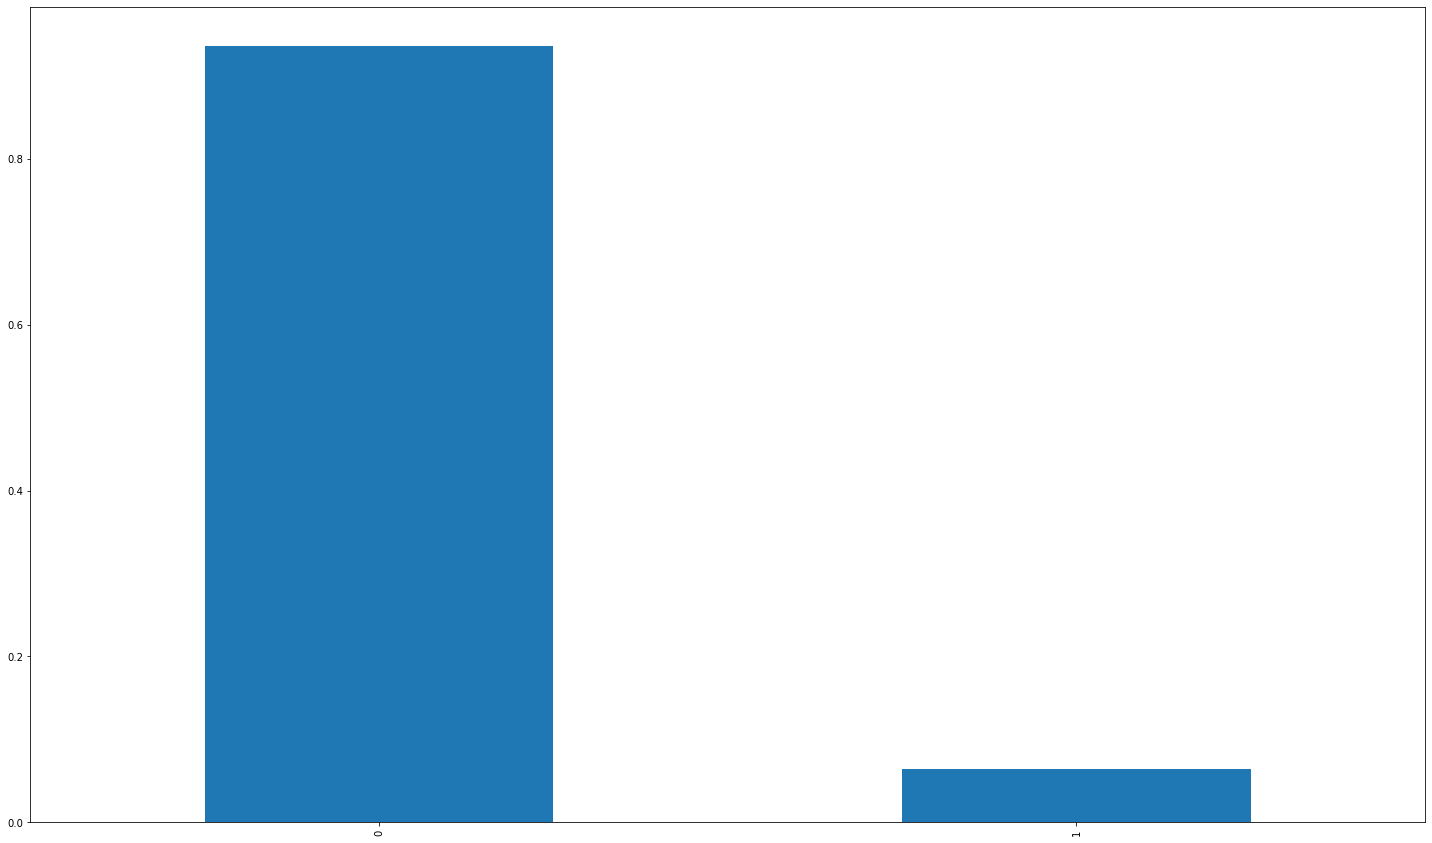

In [8]:
train.is_claim.value_counts(normalize = True).plot(kind = "bar")
plt.show()

In [9]:
train.loc[train.is_claim==1, ].describe(include = "object")

,policy_id,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
count,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748,3748
unique,3748,22,6,11,3,9,9,11,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2
top,ID00013,C8,B2,M6,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,K Series Dual jet,No,Yes,No,Yes,No,Drum,Manual,Power,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
freq,1,954,1256,939,1363,1220,1220,939,2551,2370,2847,3620,2290,2847,2438,2078,2254,2646,2646,2418,2136,2757,2757,3675,2269,2267,2757,3733


In [10]:
combined.select_dtypes(include = np.number).columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'displacement', 'cylinder',
       'gear_box', 'turning_radius', 'length', 'width', 'height',
       'gross_weight', 'ncap_rating', 'is_claim'],
      dtype='object')

In [11]:
# Convert ncap in category
combined["ncap_rating"] = combined["ncap_rating"].astype("object") 

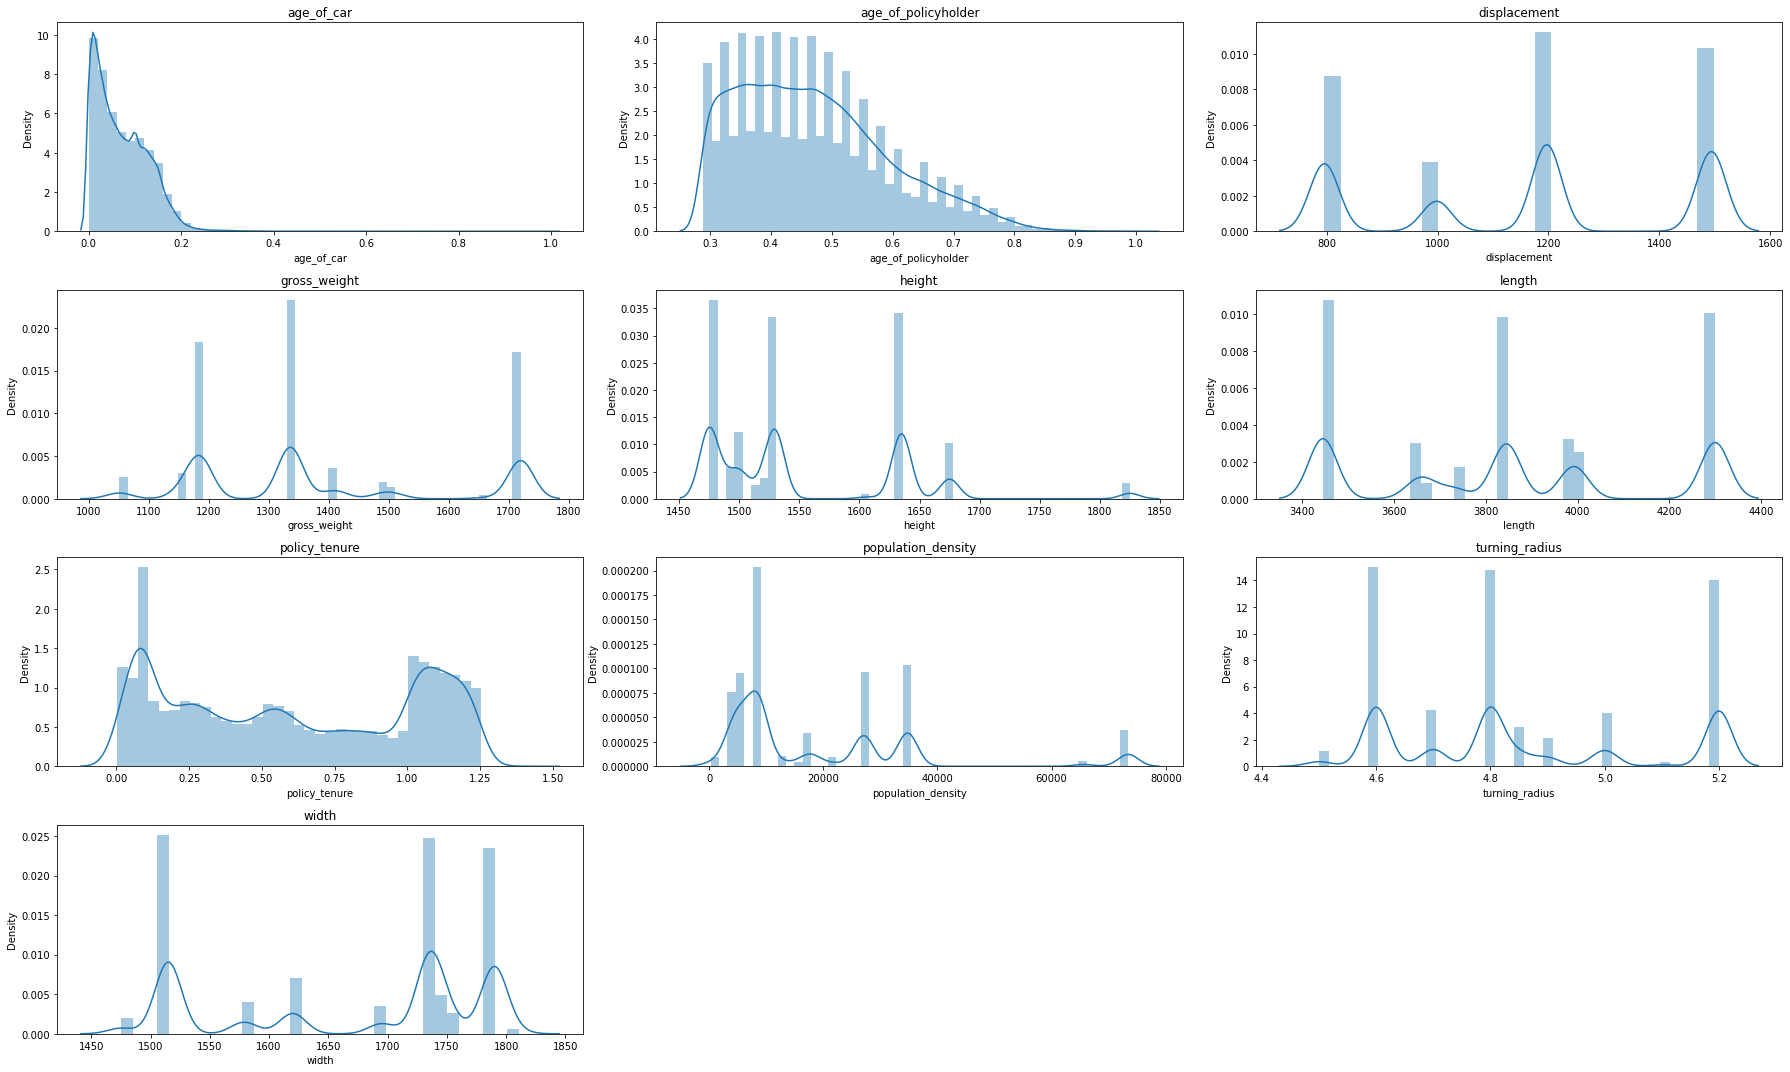

In [12]:
num_cols = ['age_of_car', 'age_of_policyholder',
       'displacement',  'gross_weight', 'height', 
       'length', 'policy_tenure', 'population_density',
       'turning_radius', 'width']

nrows = 4
ncols = 3
iterator = 1

for i in num_cols:
    plt.subplot(nrows, ncols, iterator)
    sns.distplot(combined.loc[:, i])
    plt.title(i)
    iterator+=1
plt.tight_layout()
plt.show()

In [13]:
combined.loc[:, num_cols].describe()

,age_of_car,age_of_policyholder,displacement,gross_weight,height,length,policy_tenure,population_density,turning_radius,width
count,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.000000,97655.00000,97655.000000,97655.000000
mean,0.069508,0.469287,1161.655829,1384.966750,1553.214500,3850.017715,0.611269,18822.60809,4.853024,1672.050187
std,0.056774,0.122560,266.560176,212.543007,79.385788,311.745860,0.414494,17656.79257,0.228059,112.042508
min,0.000000,0.288462,796.000000,1051.000000,1475.000000,3445.000000,0.002735,290.00000,4.500000,1475.000000
25%,0.020000,0.375000,796.000000,1185.000000,1475.000000,3445.000000,0.209729,6112.00000,4.600000,1515.000000
50%,0.060000,0.451923,1197.000000,1335.000000,1530.000000,3845.000000,0.573891,8794.00000,4.800000,1735.000000
75%,0.110000,0.548077,1493.000000,1510.000000,1635.000000,3995.000000,1.039740,27003.00000,5.000000,1755.000000
max,1.000000,1.000000,1498.000000,1720.000000,1825.000000,4300.000000,1.396641,73430.00000,5.200000,1811.000000


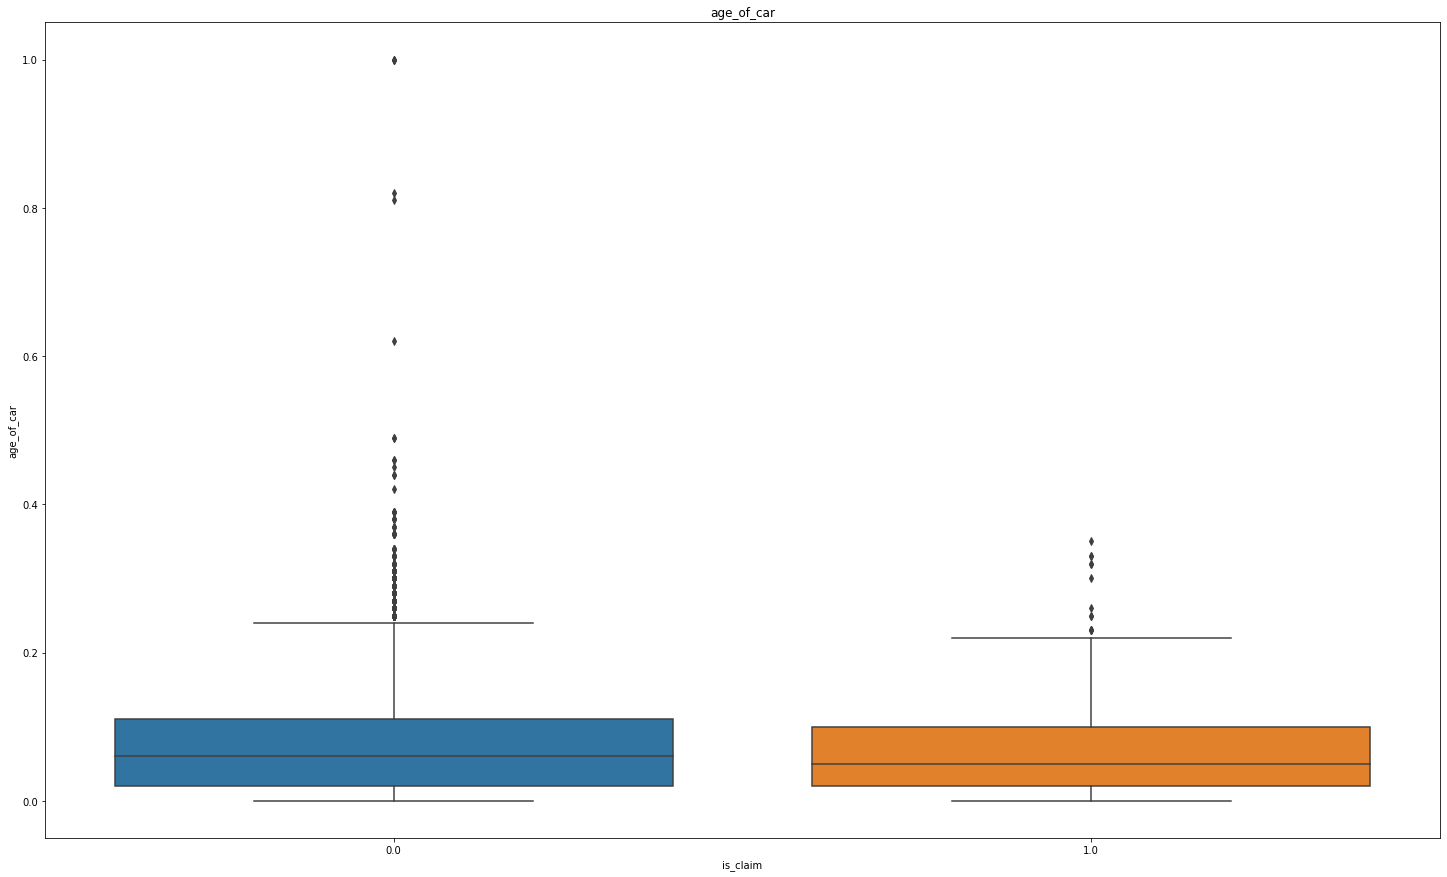

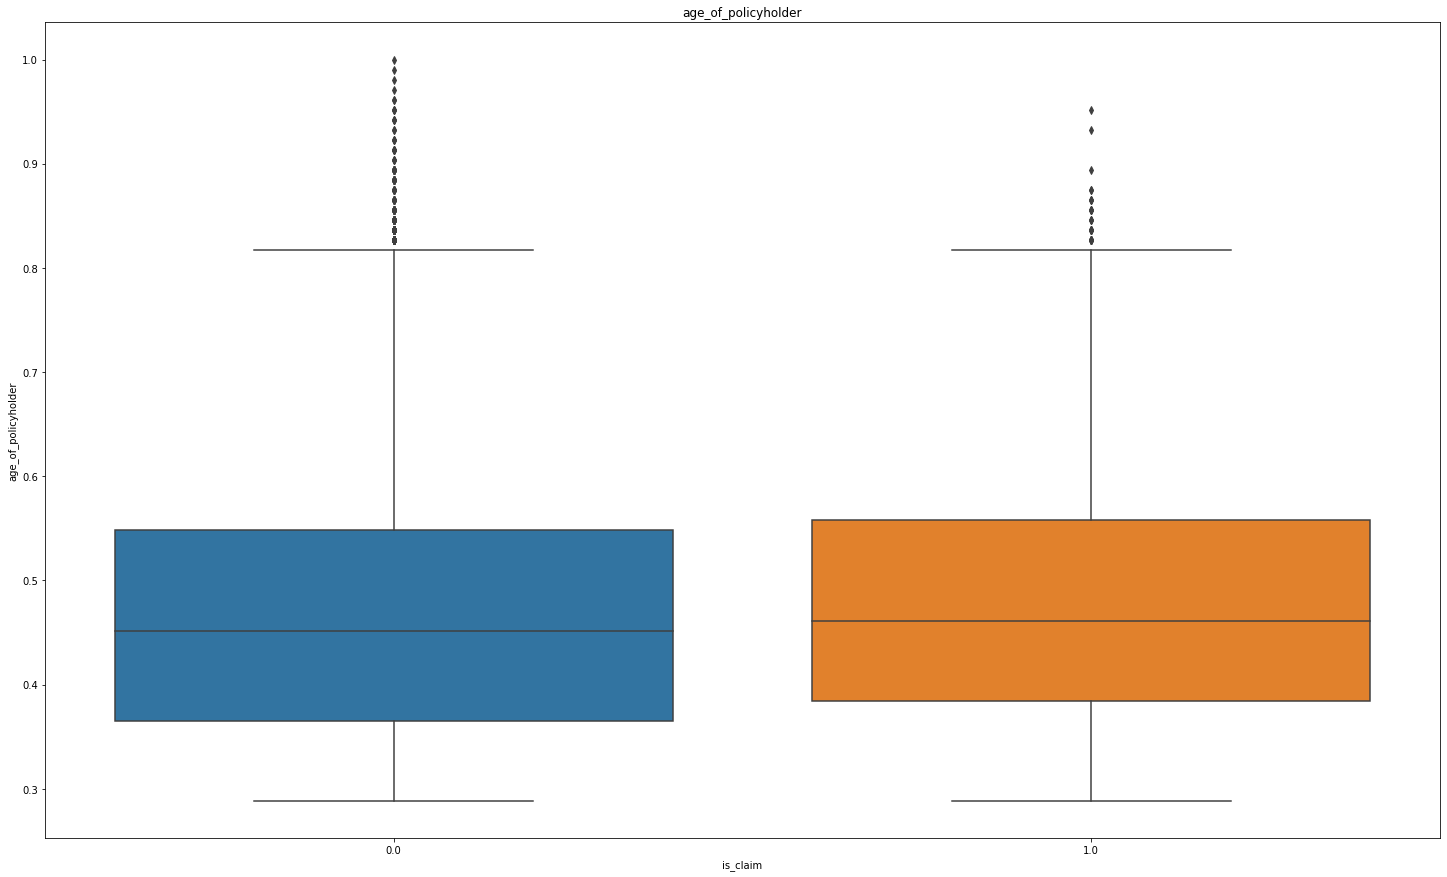

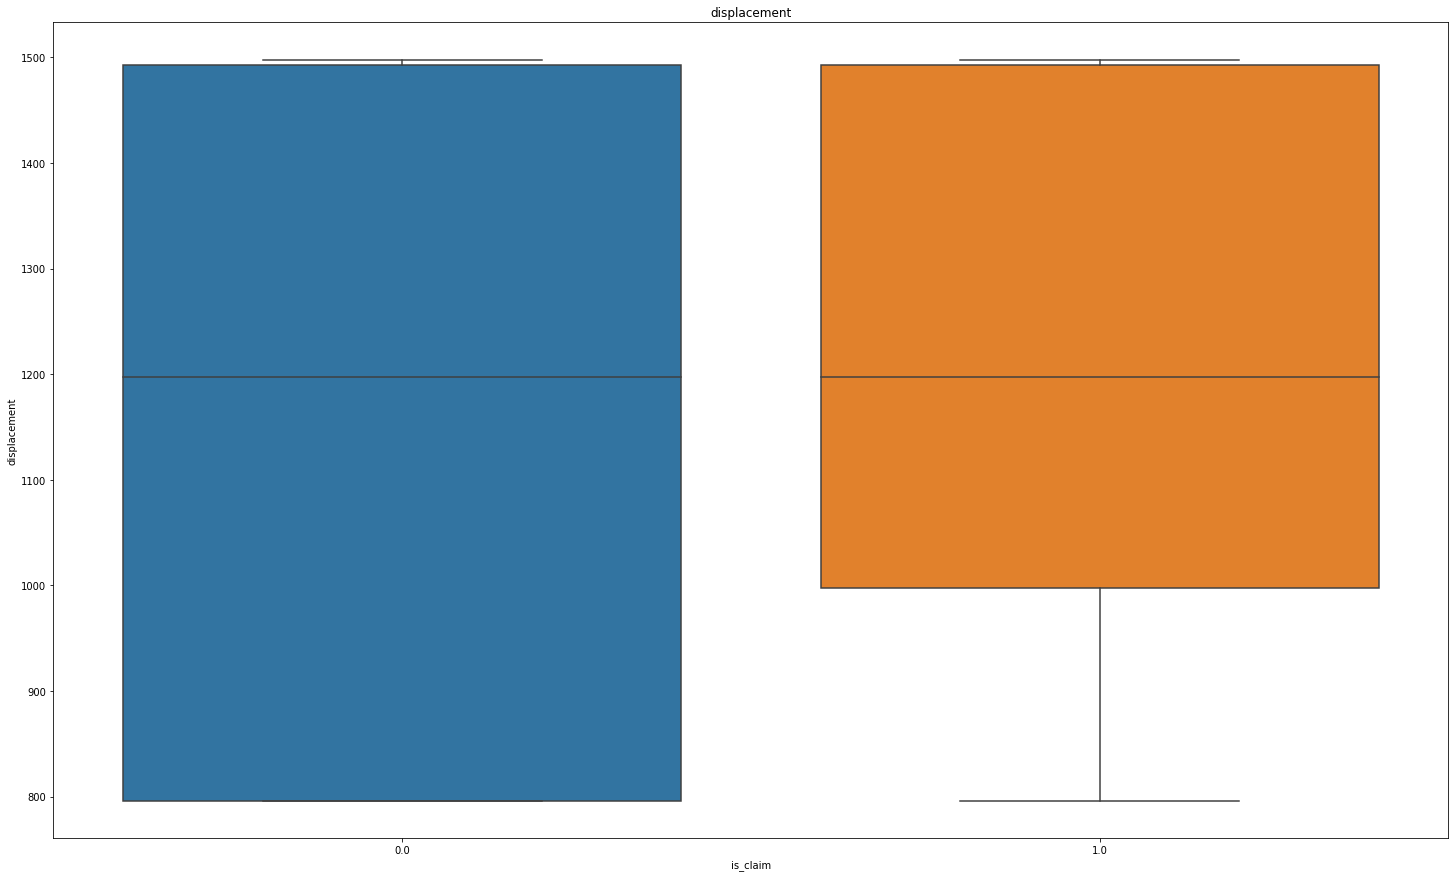

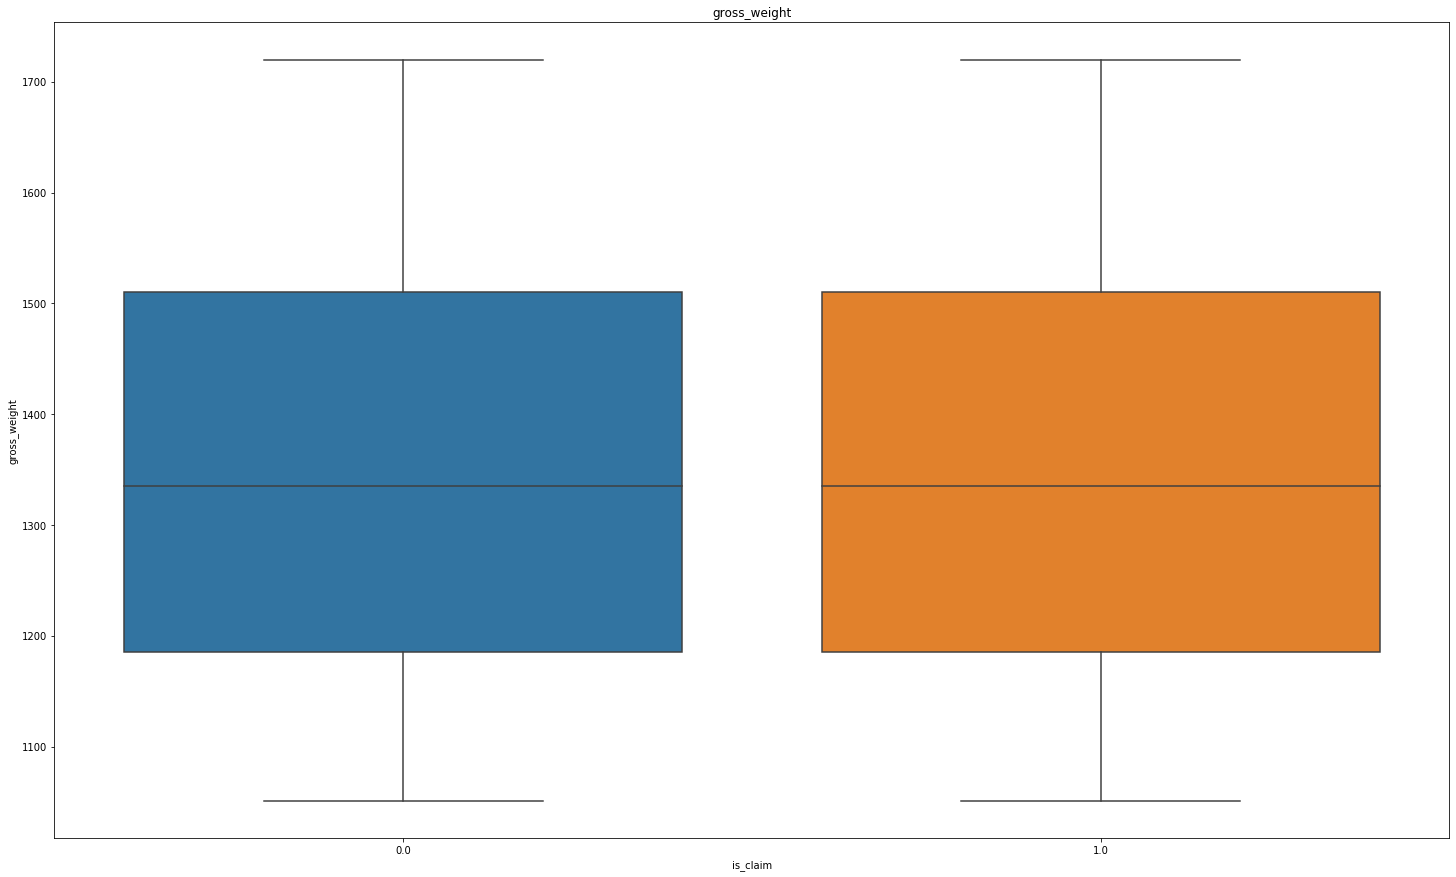

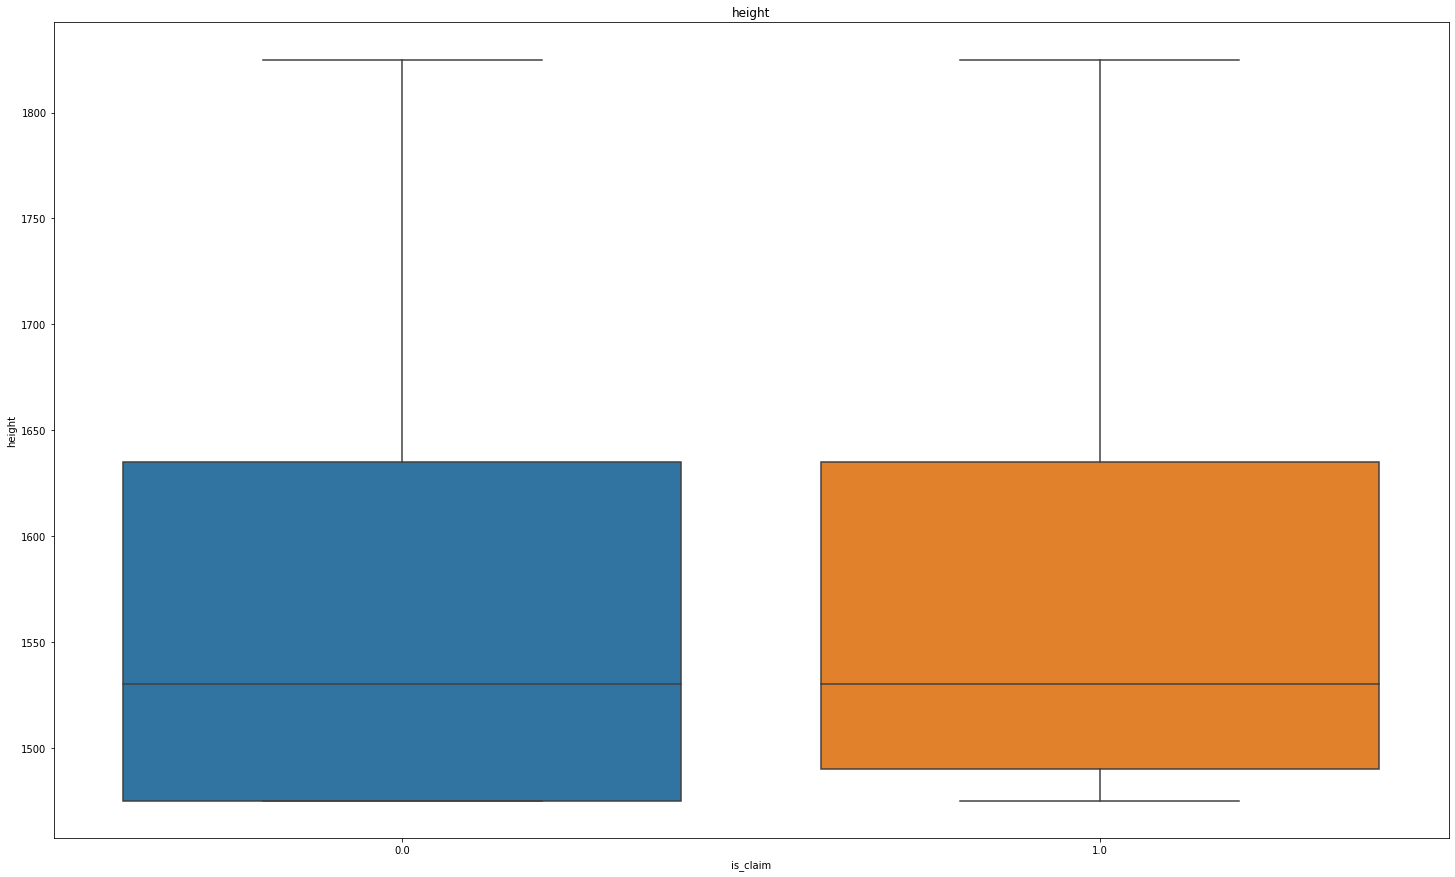

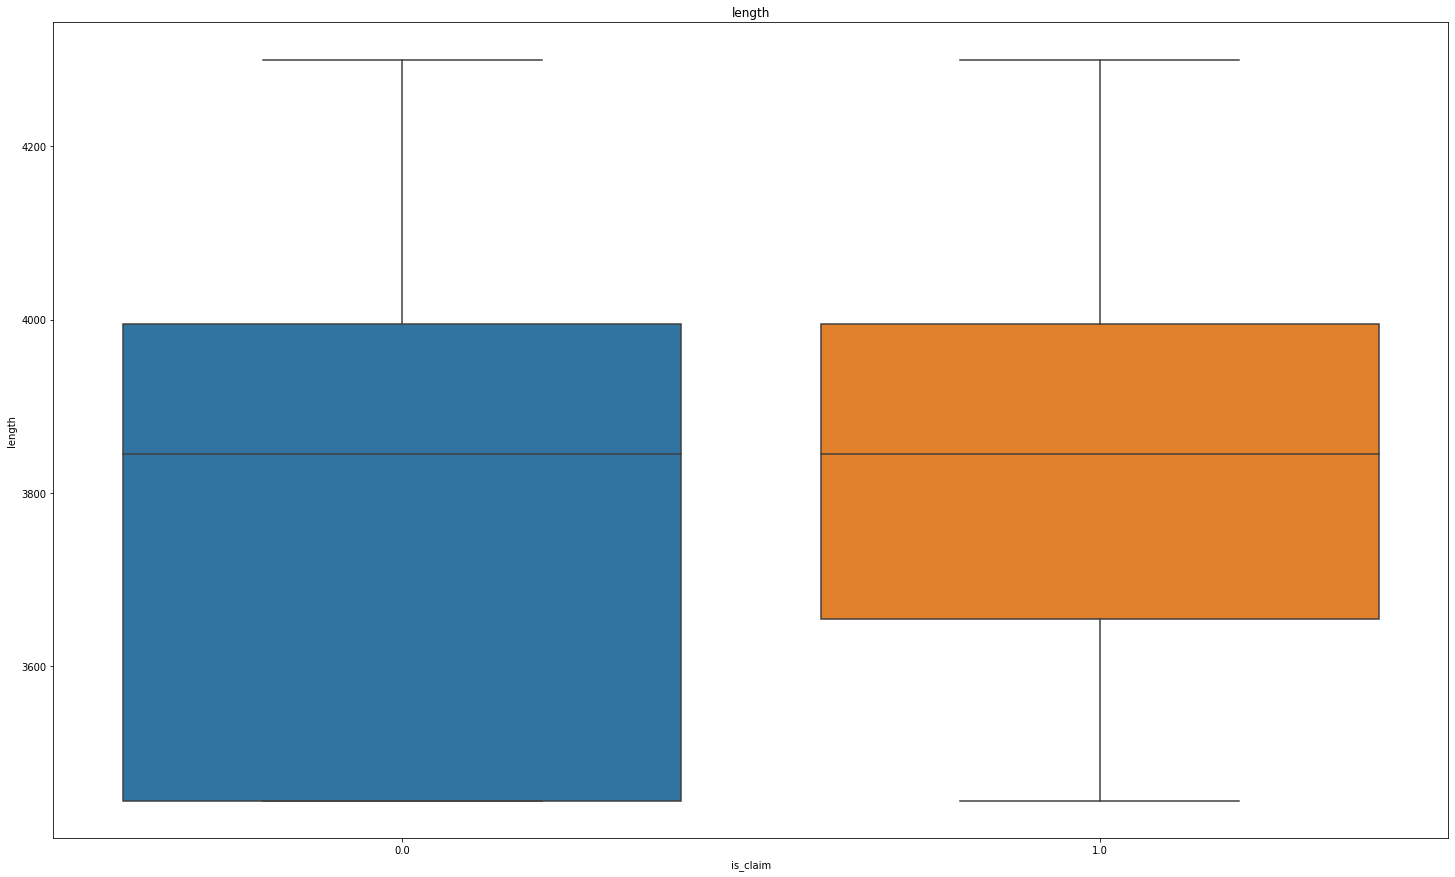

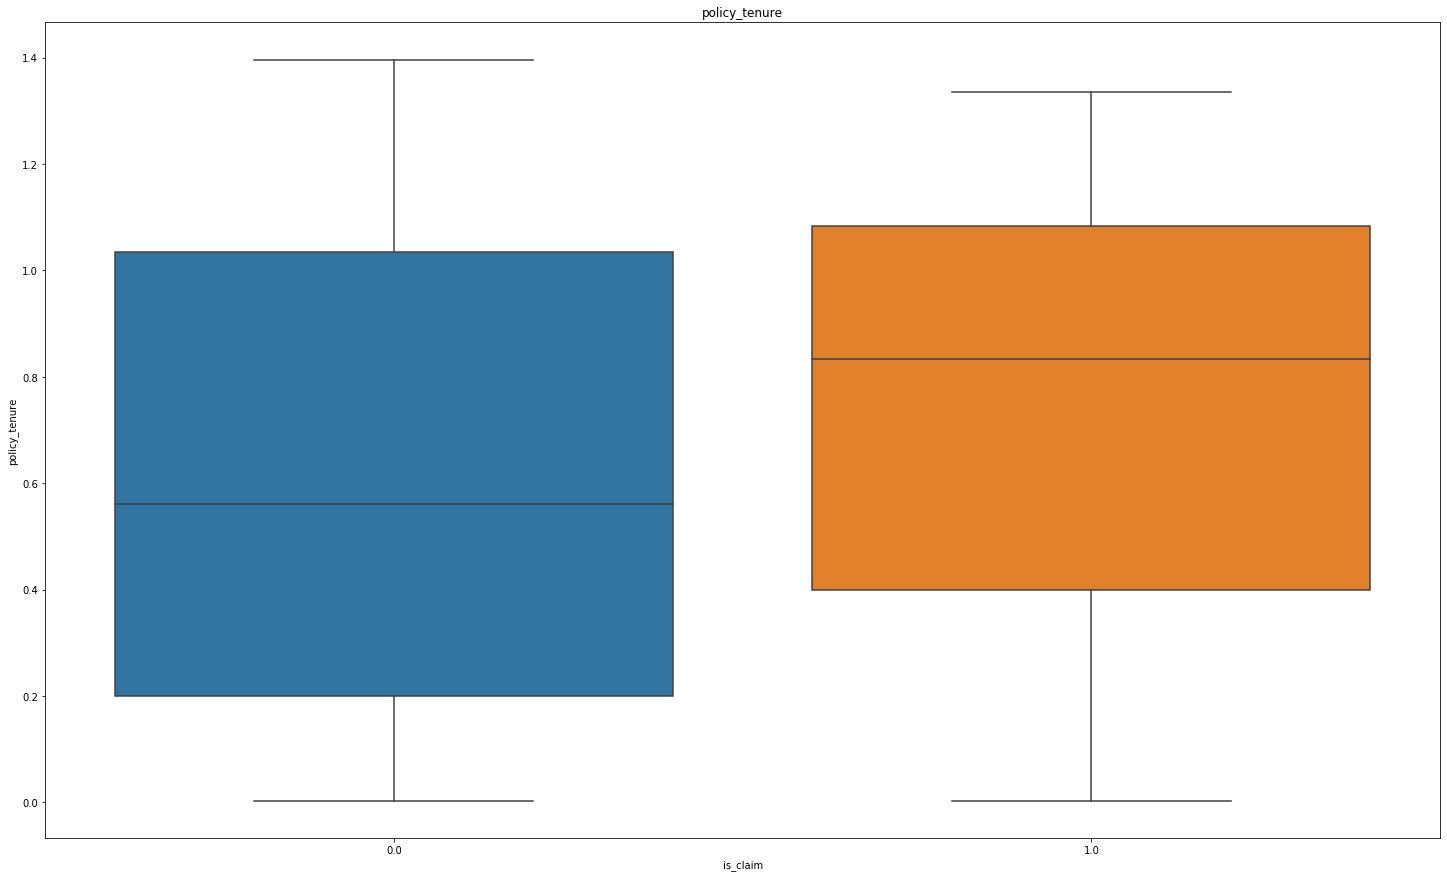

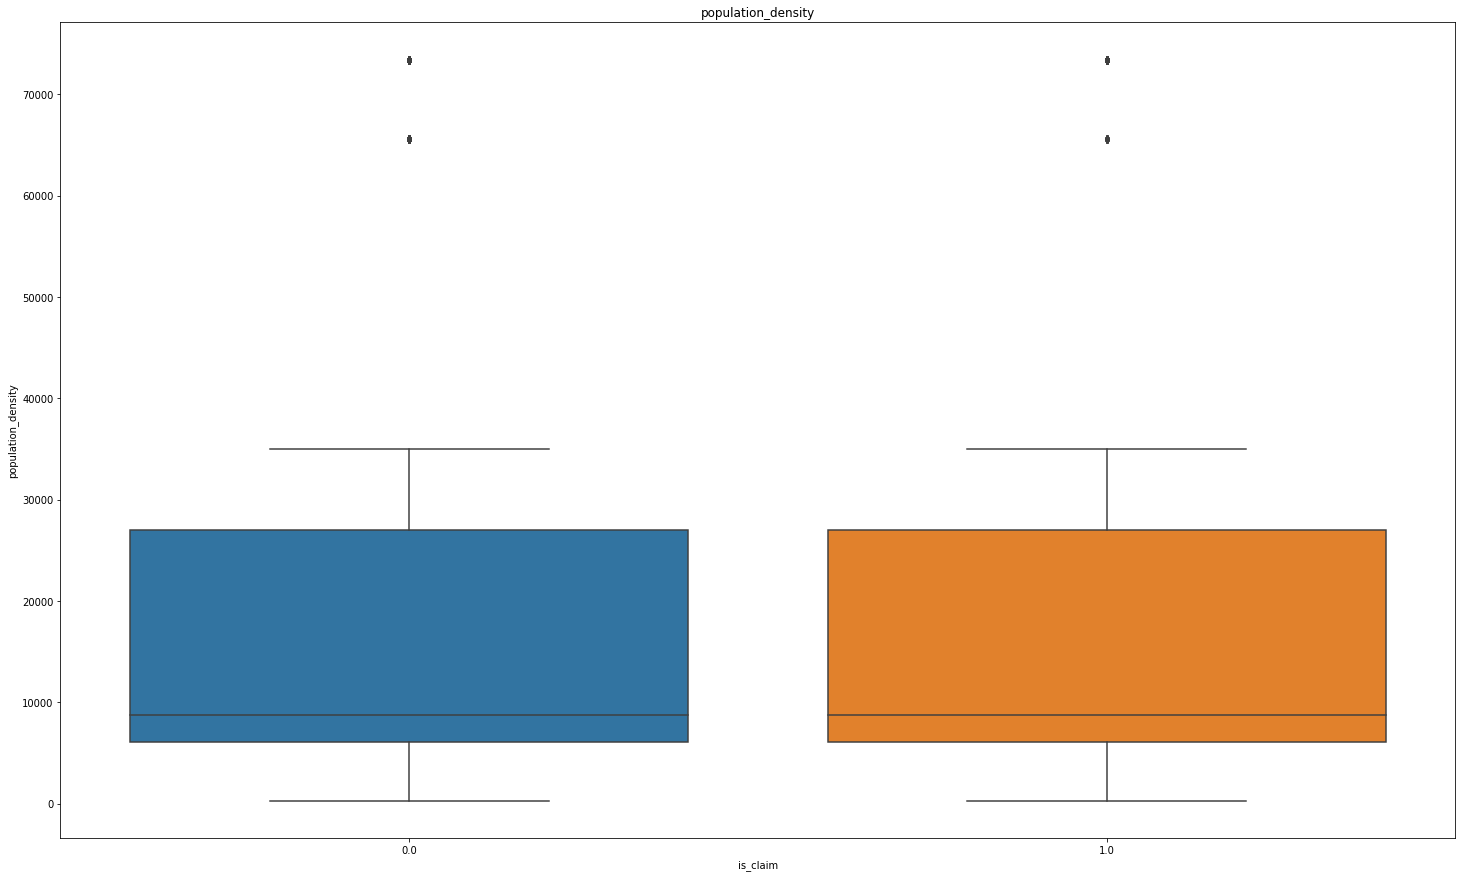

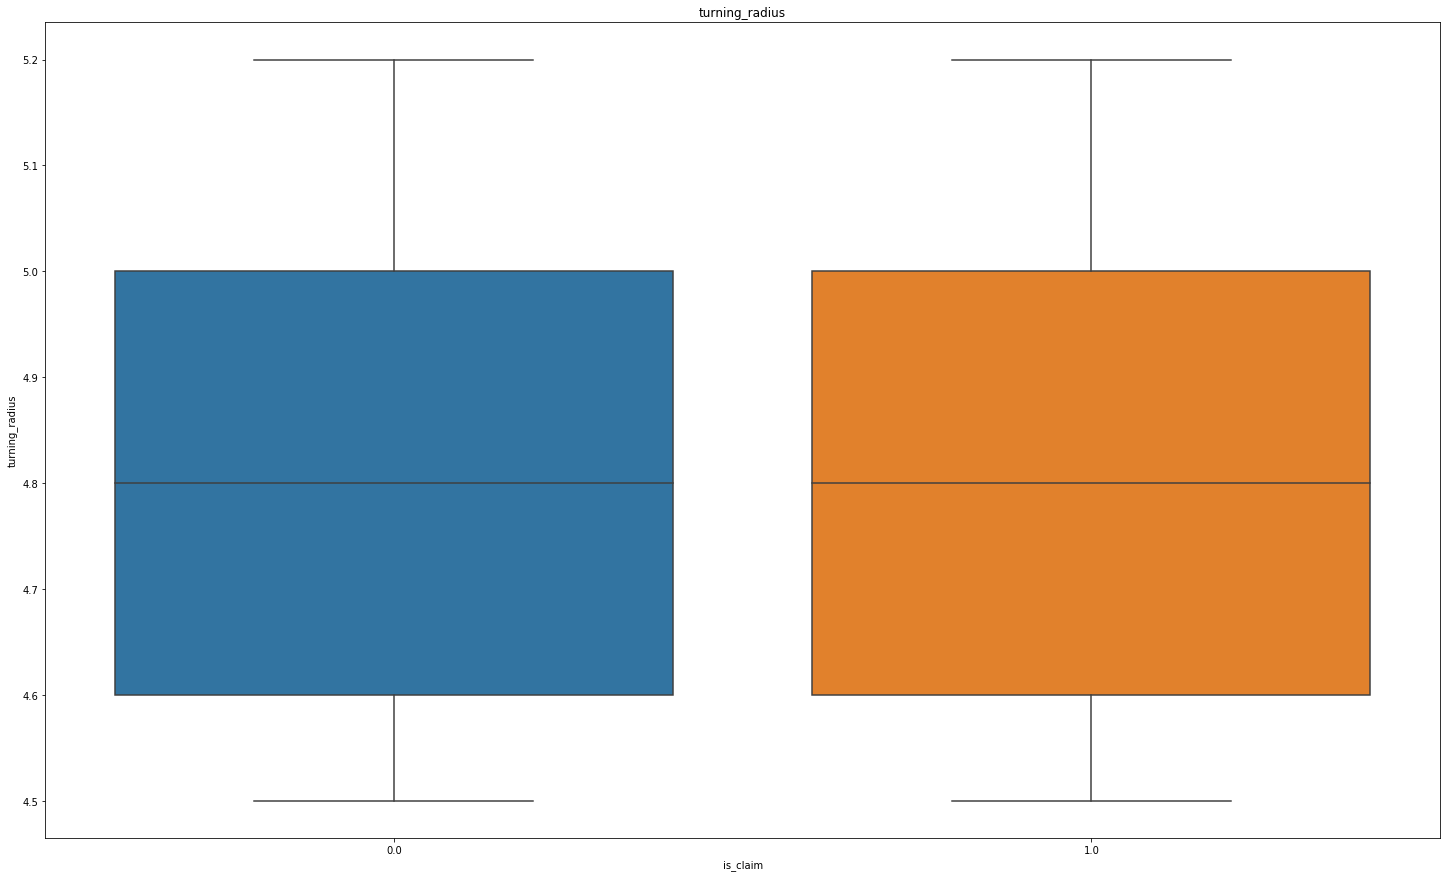

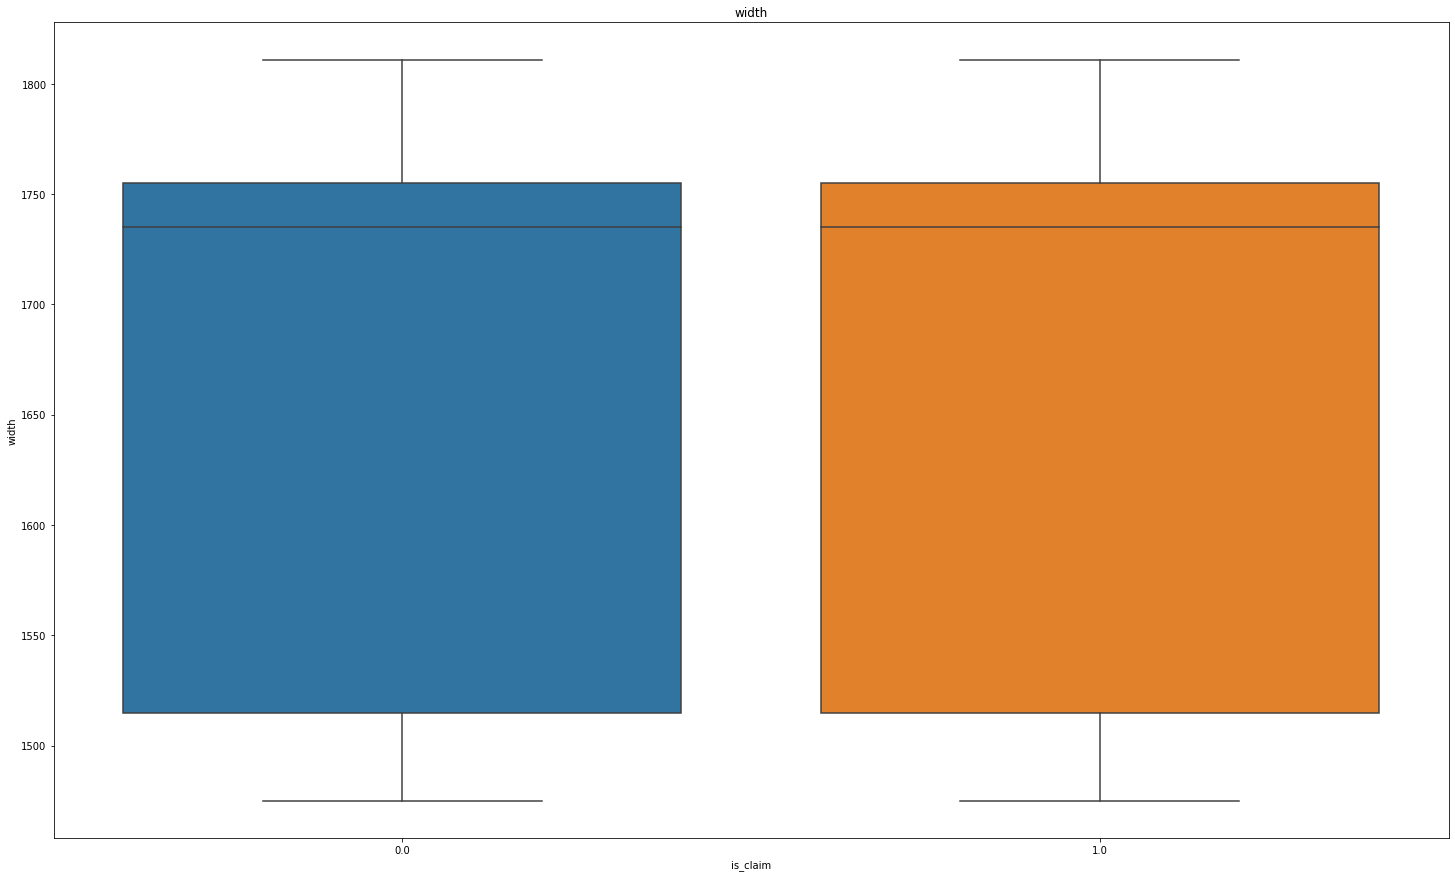

In [29]:
# Bivariate Analysis
for i in num_cols:
    sns.boxplot(combined.is_claim, combined.loc[:, i])
    plt.title(i)
    plt.show()

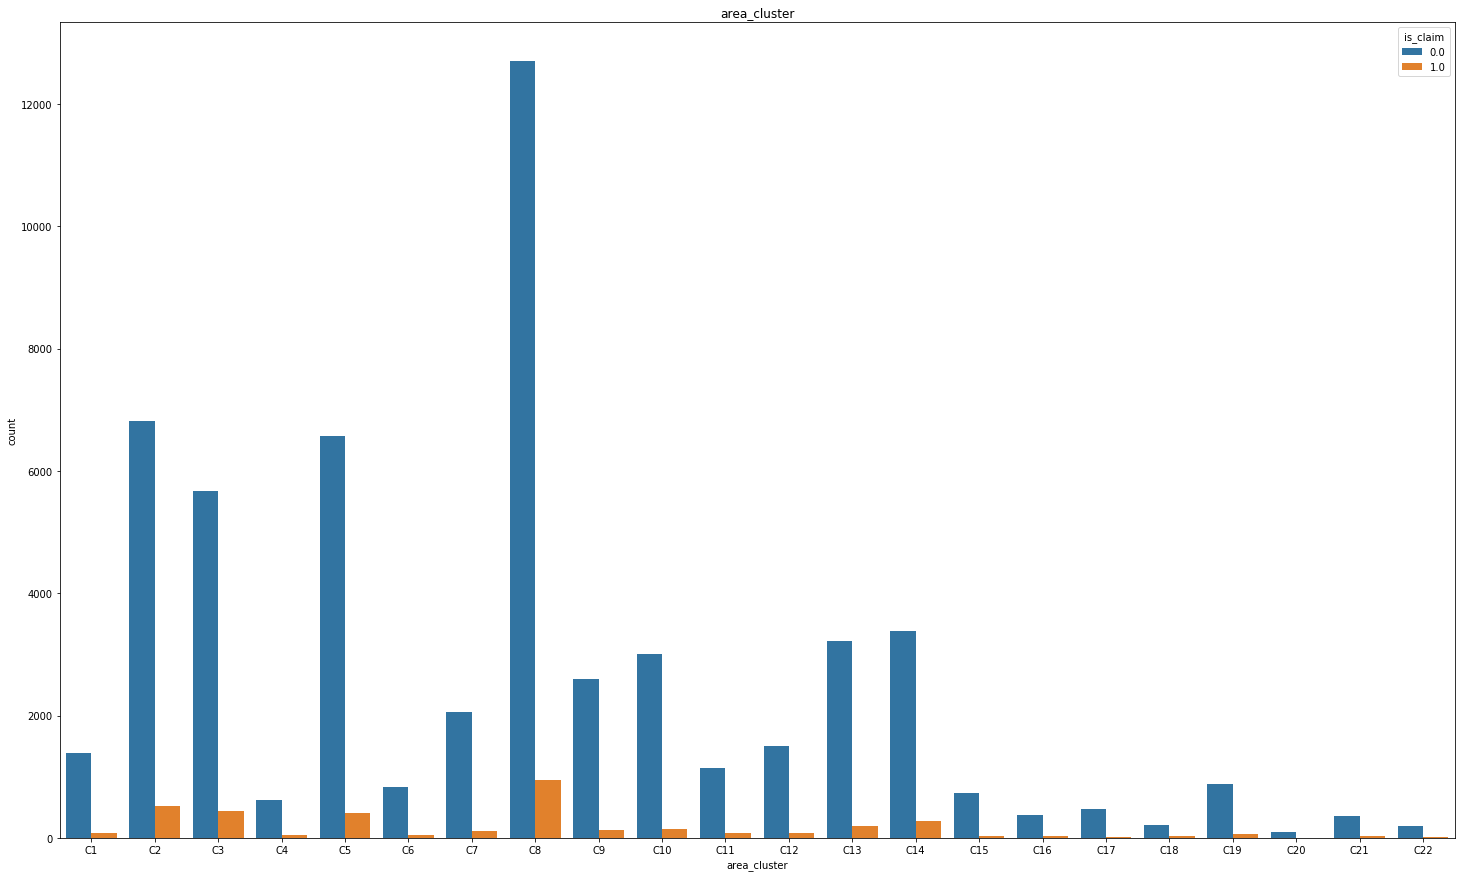

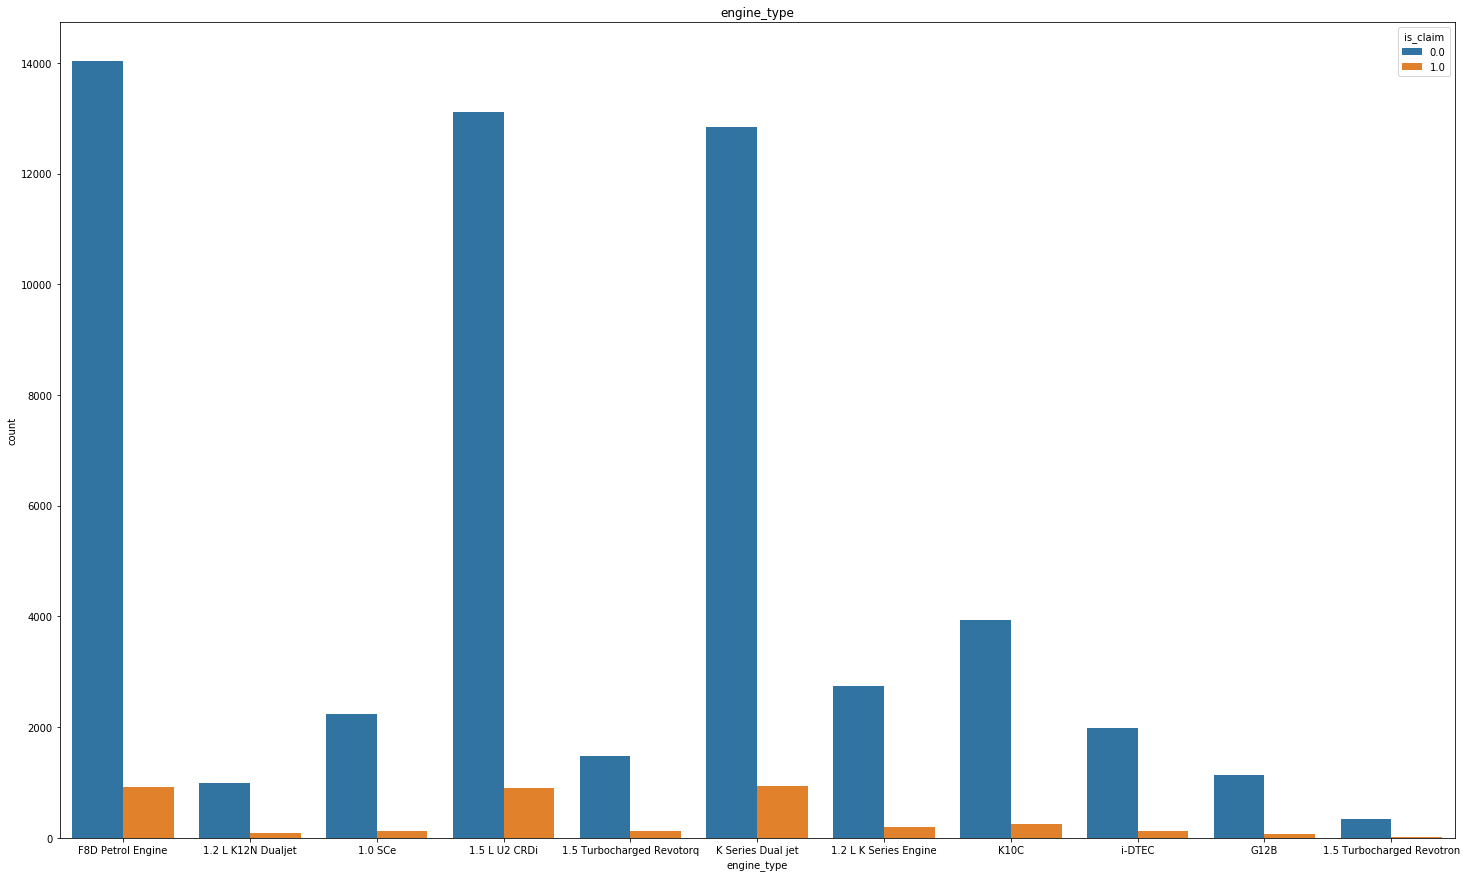

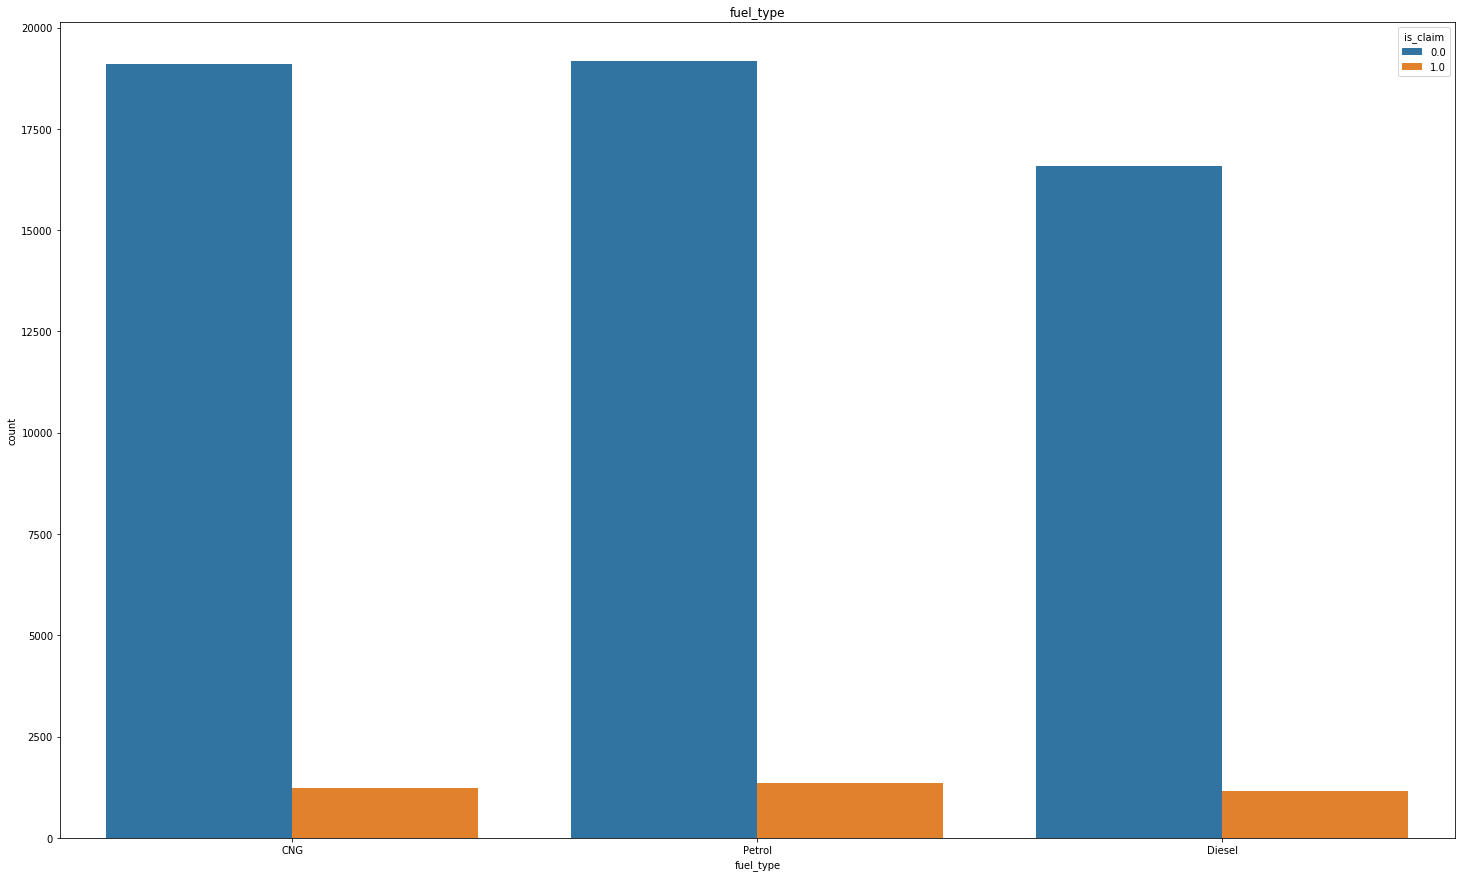

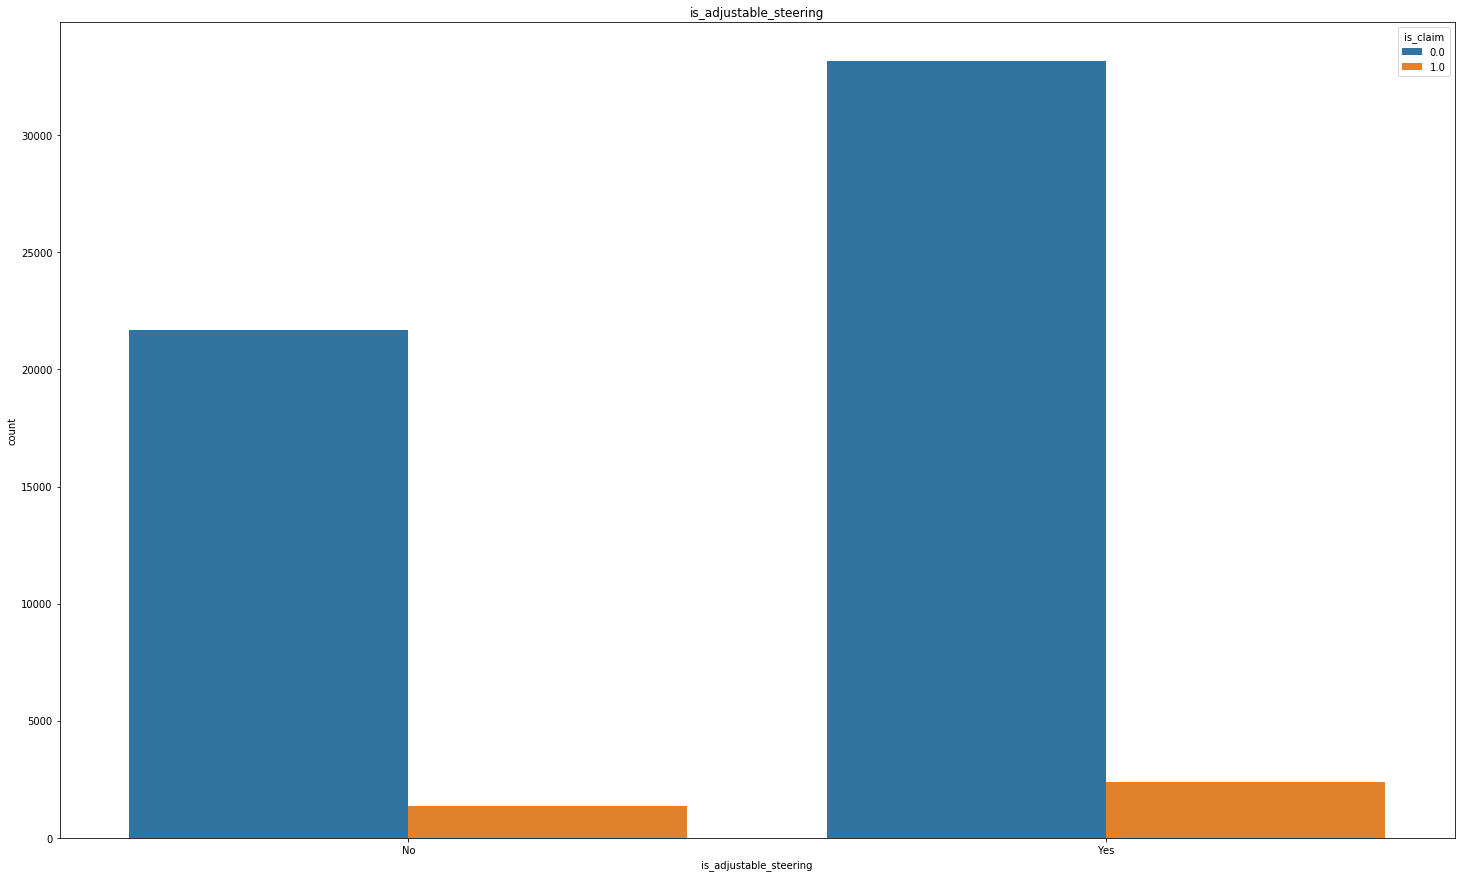

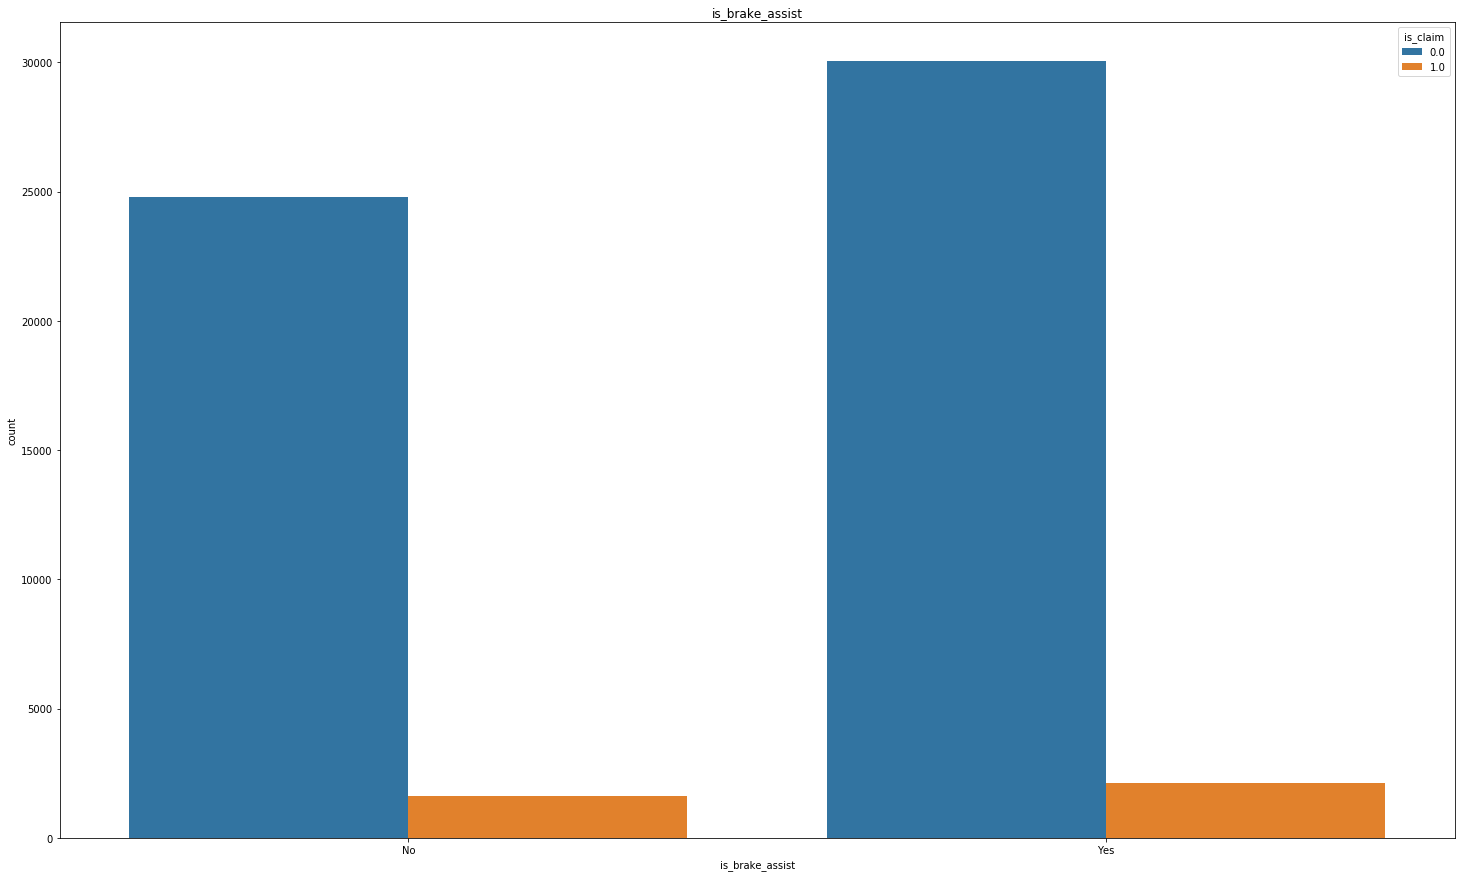

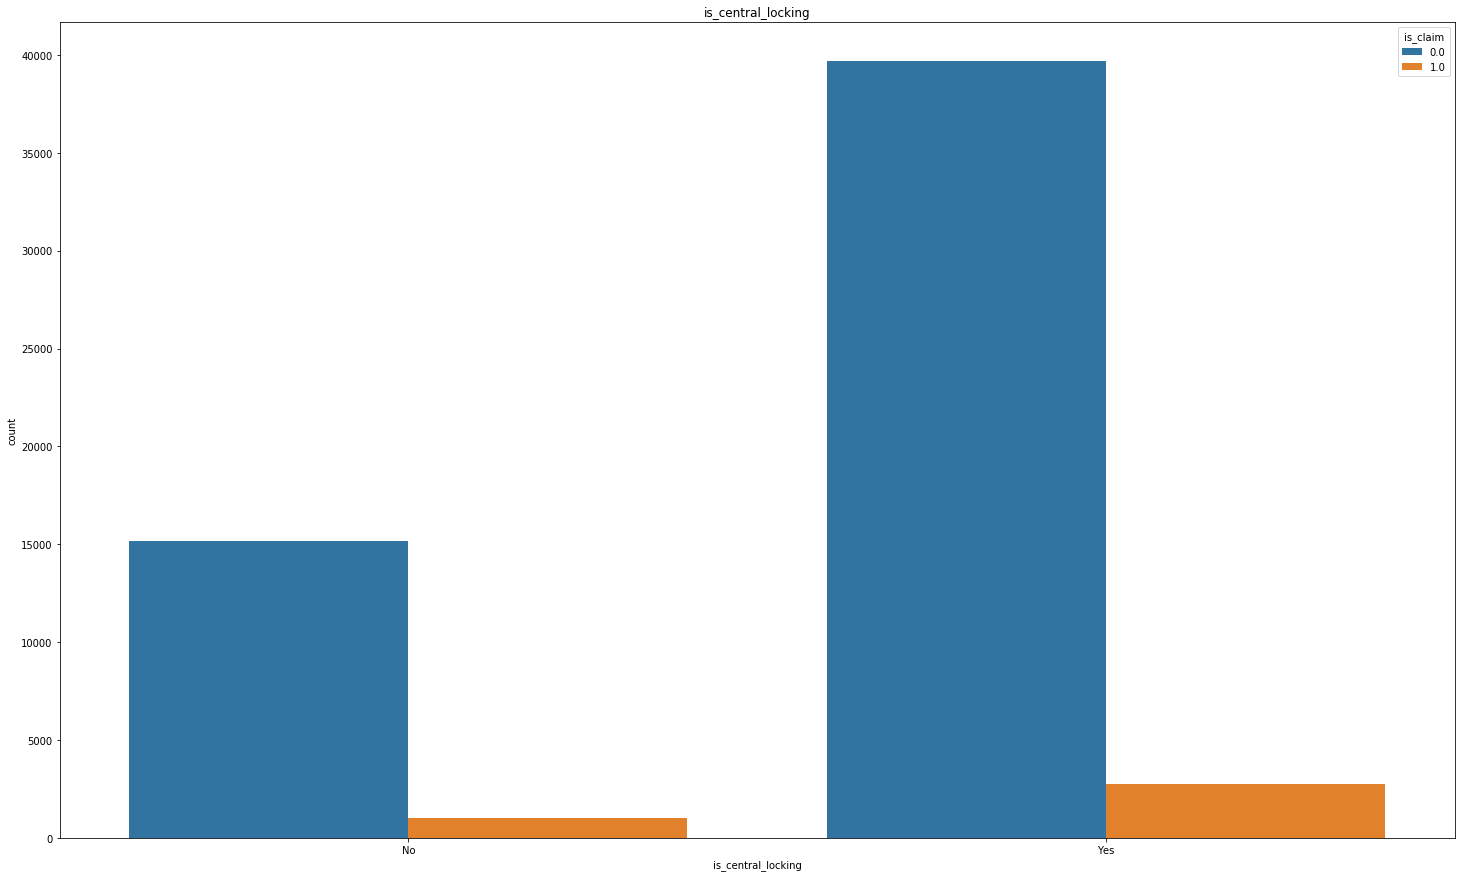

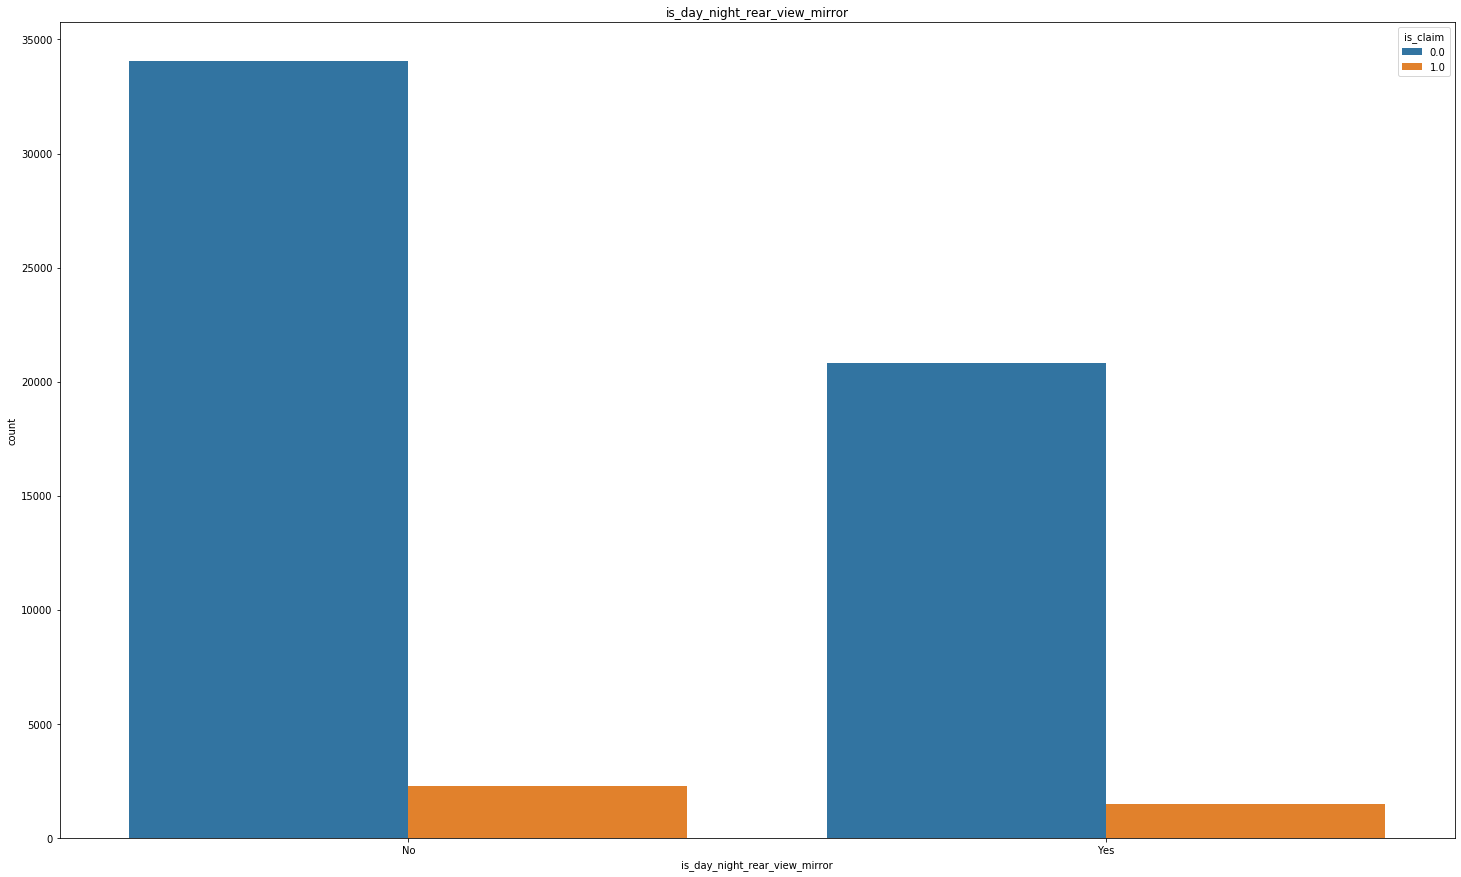

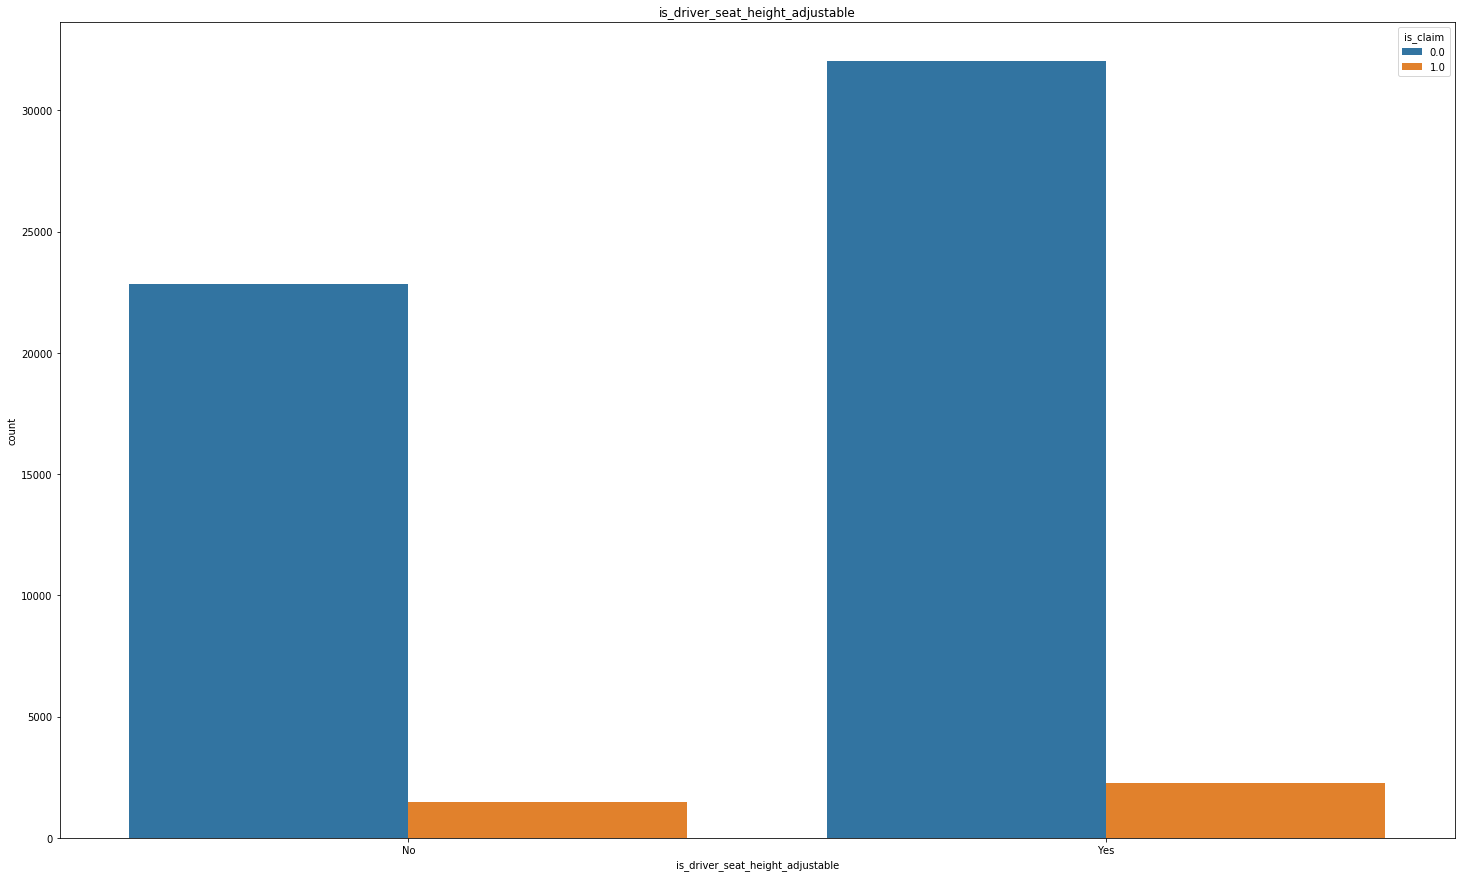

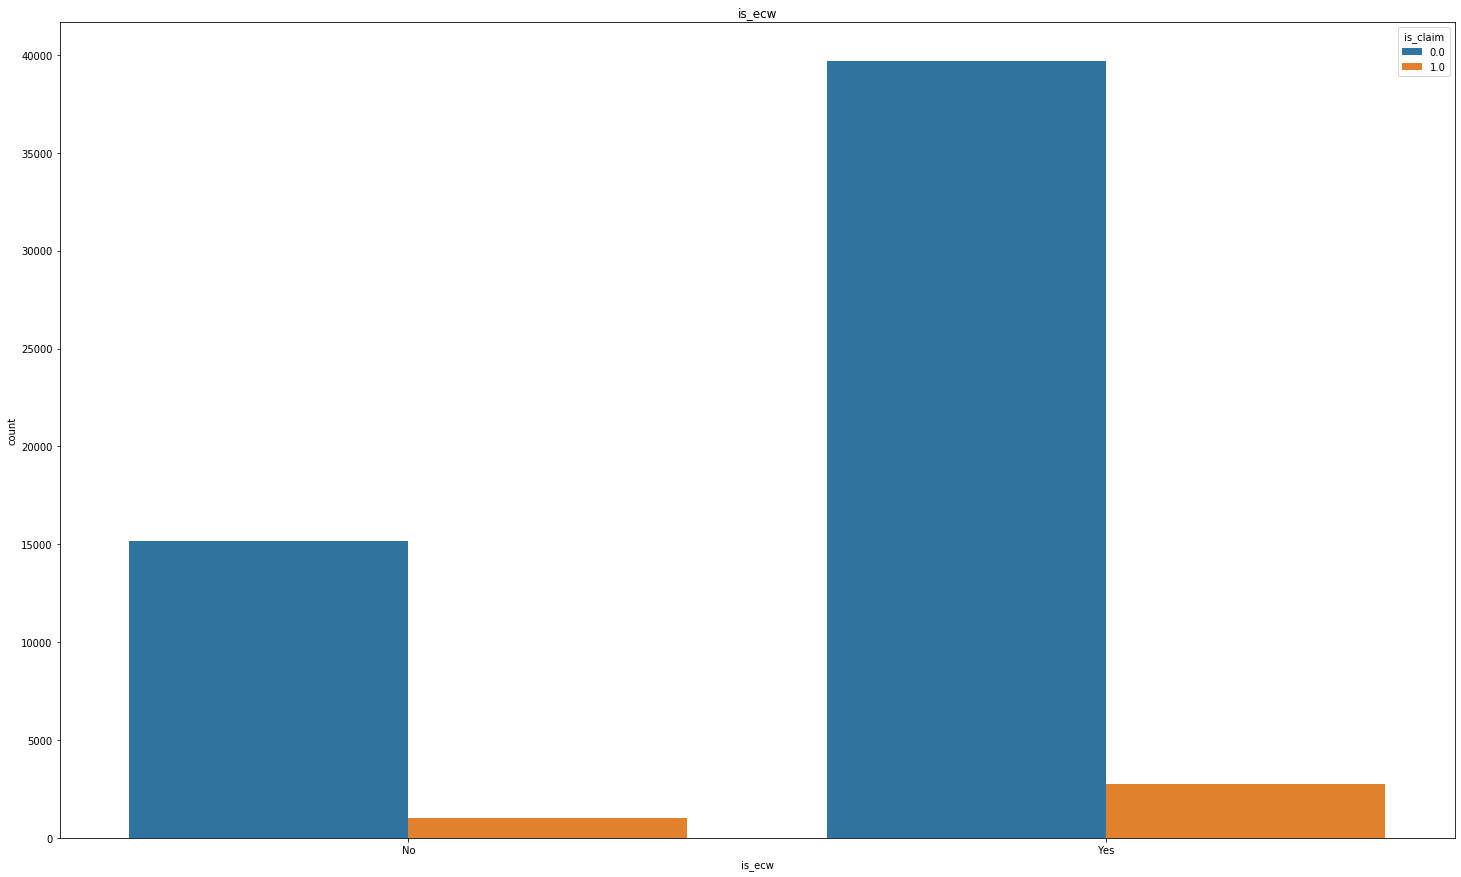

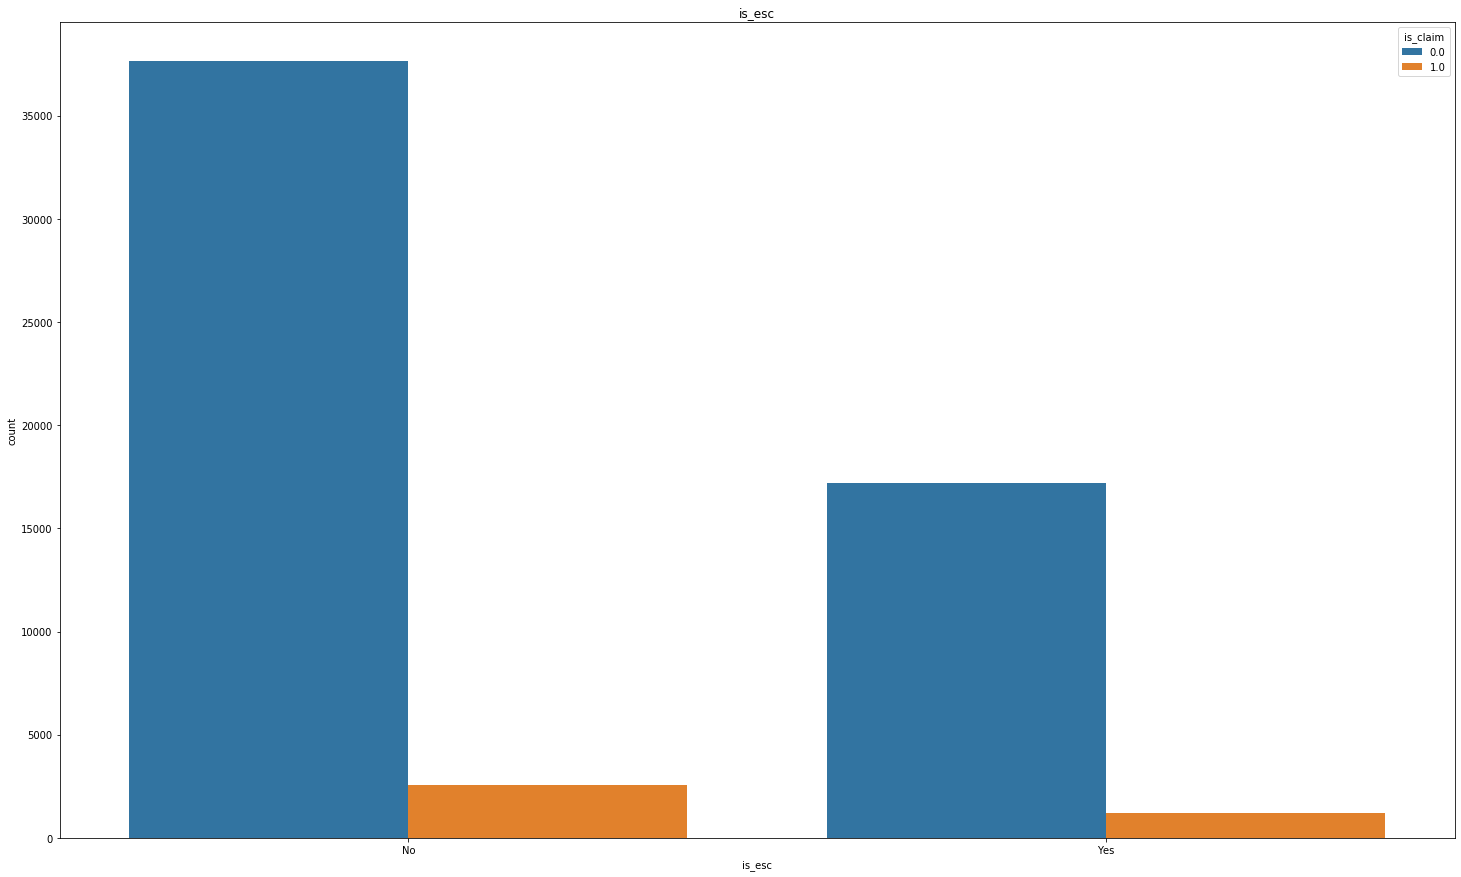

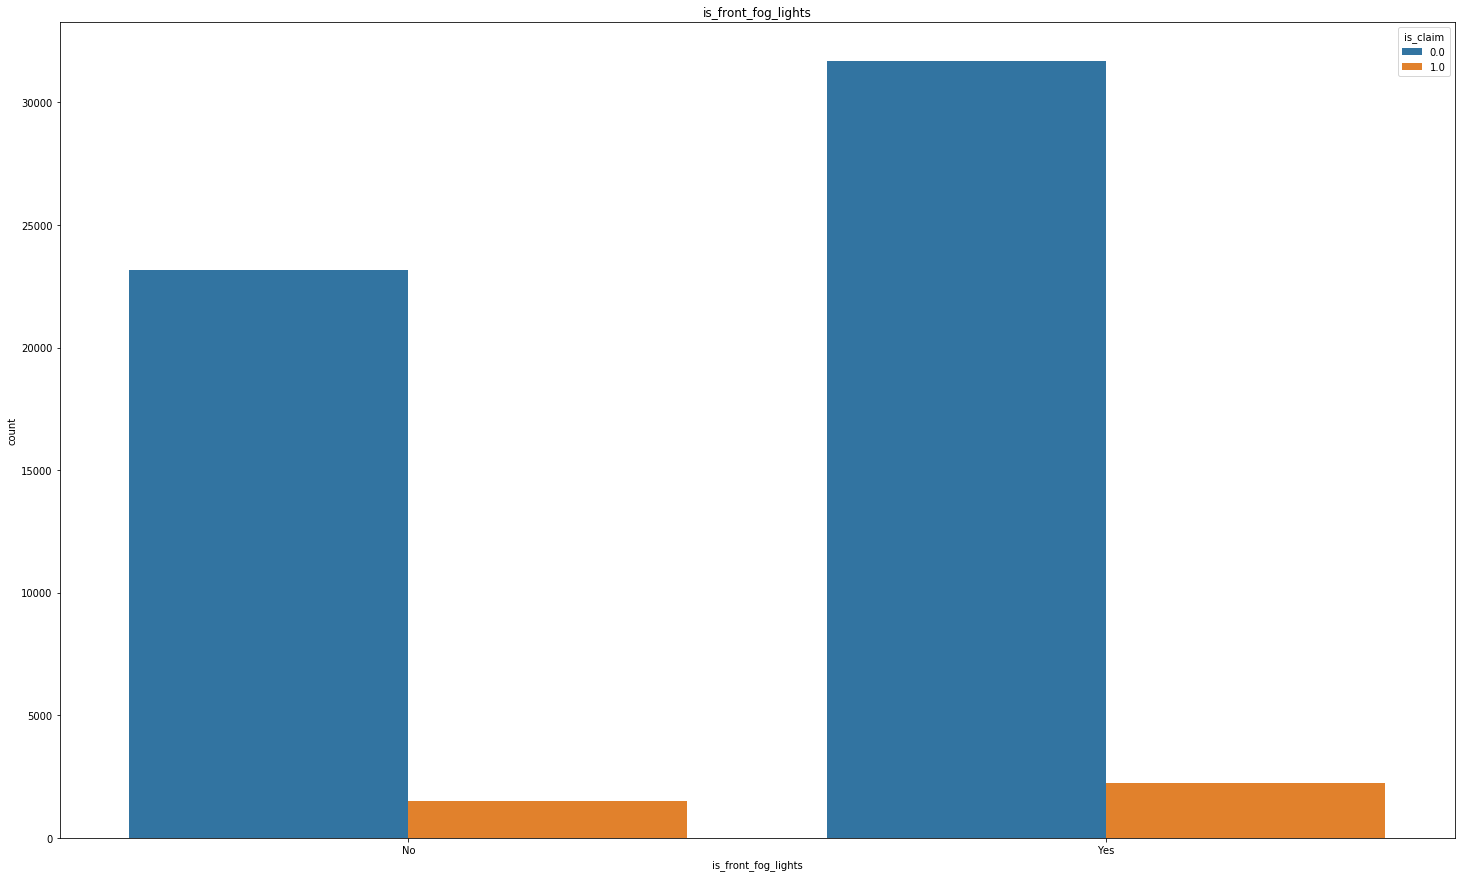

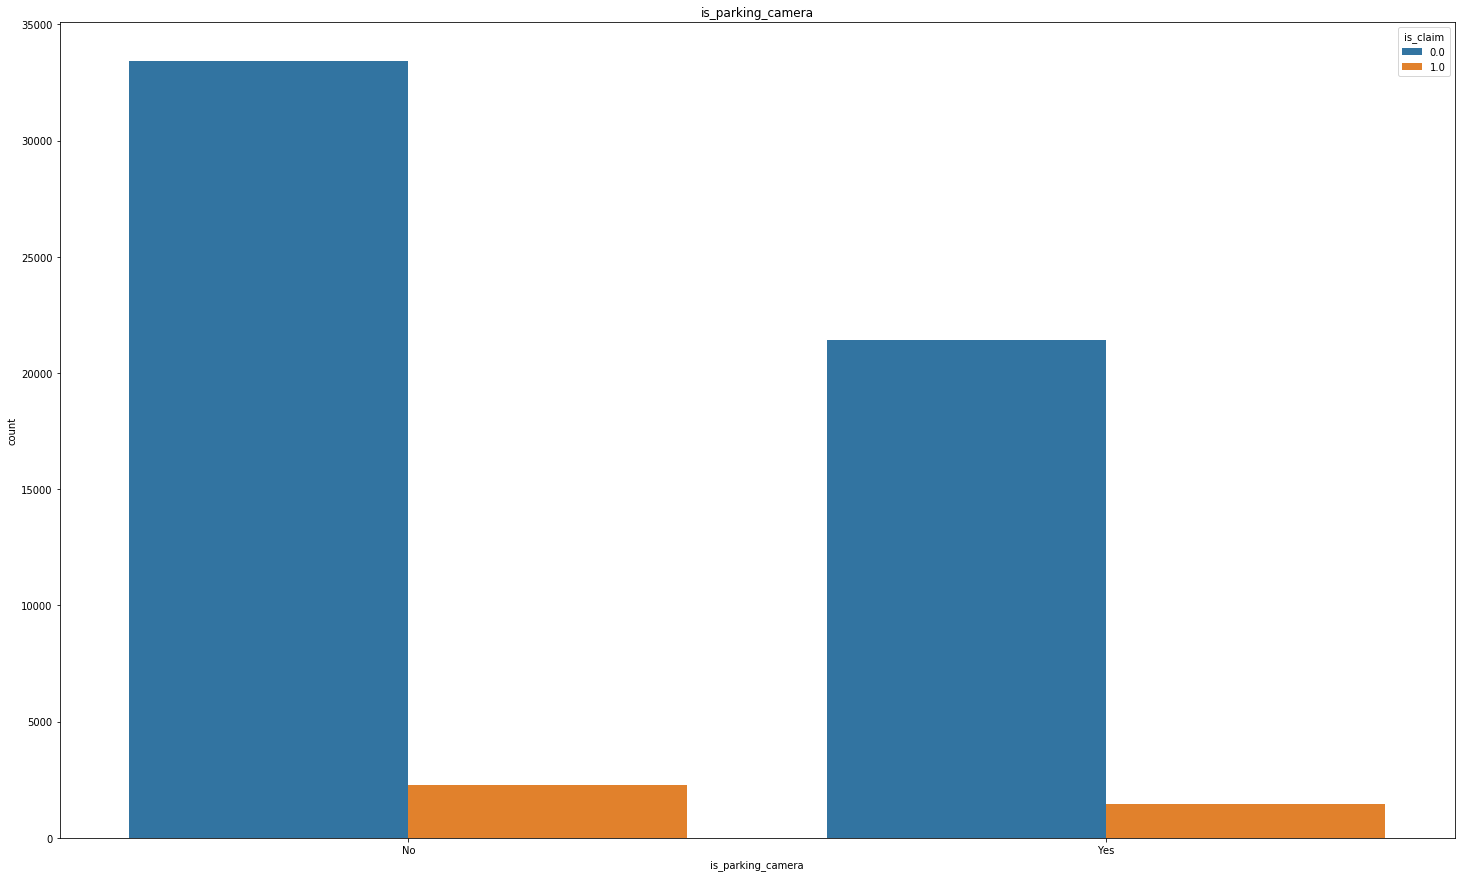

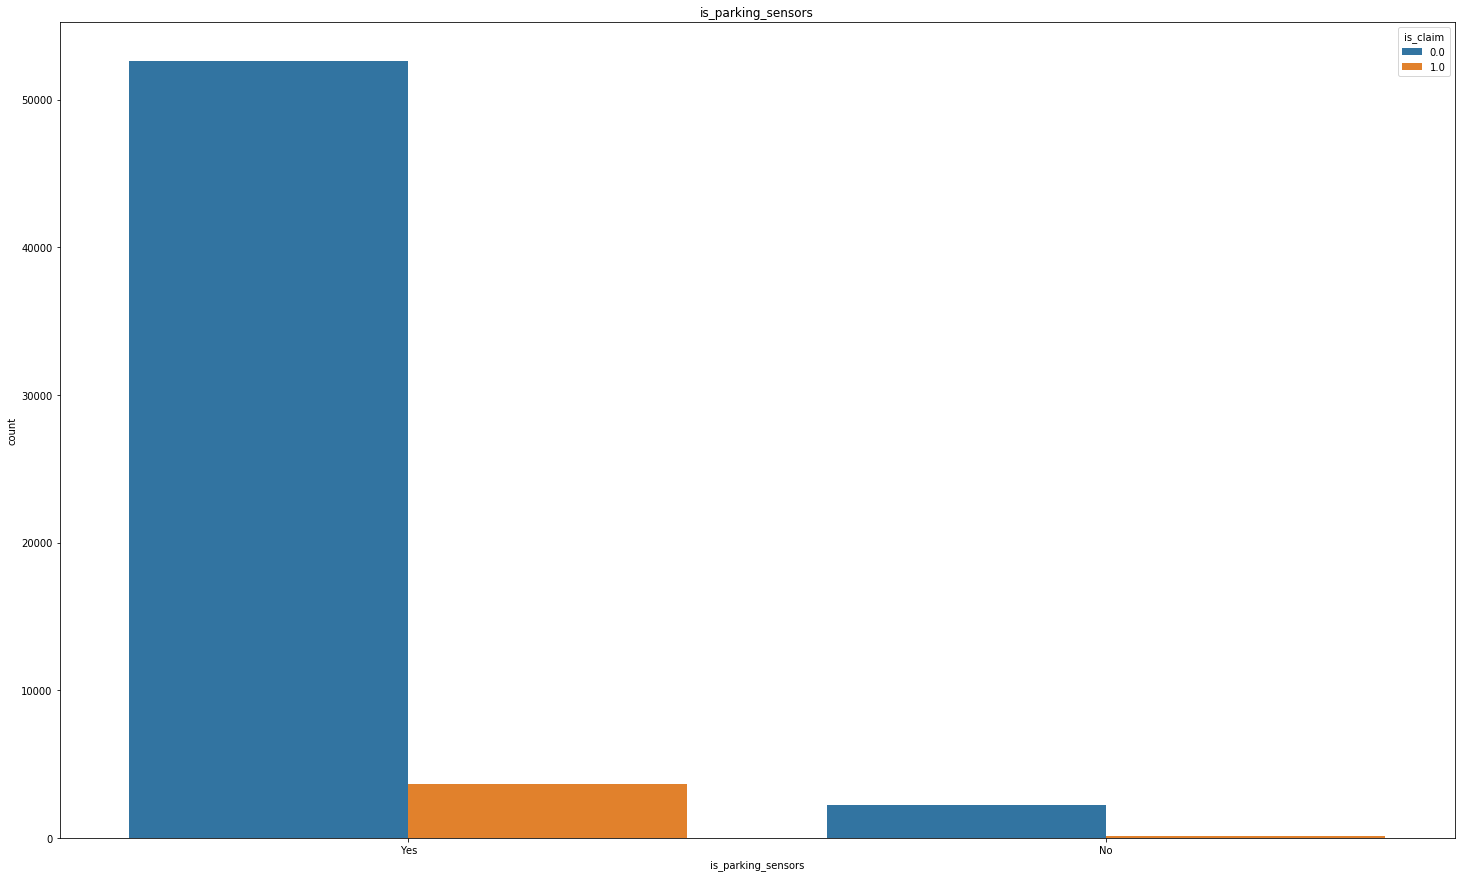

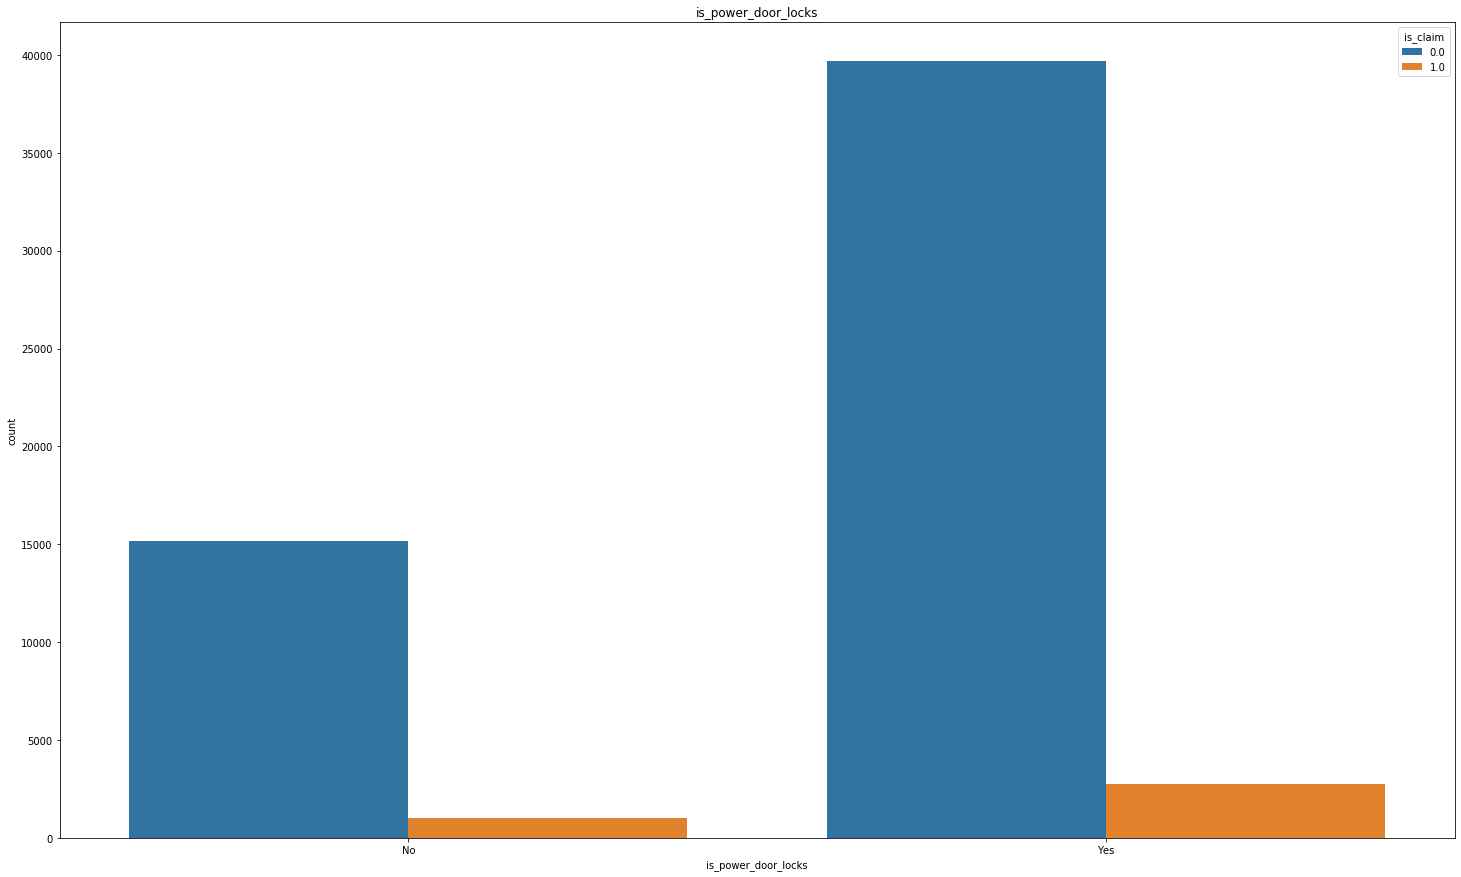

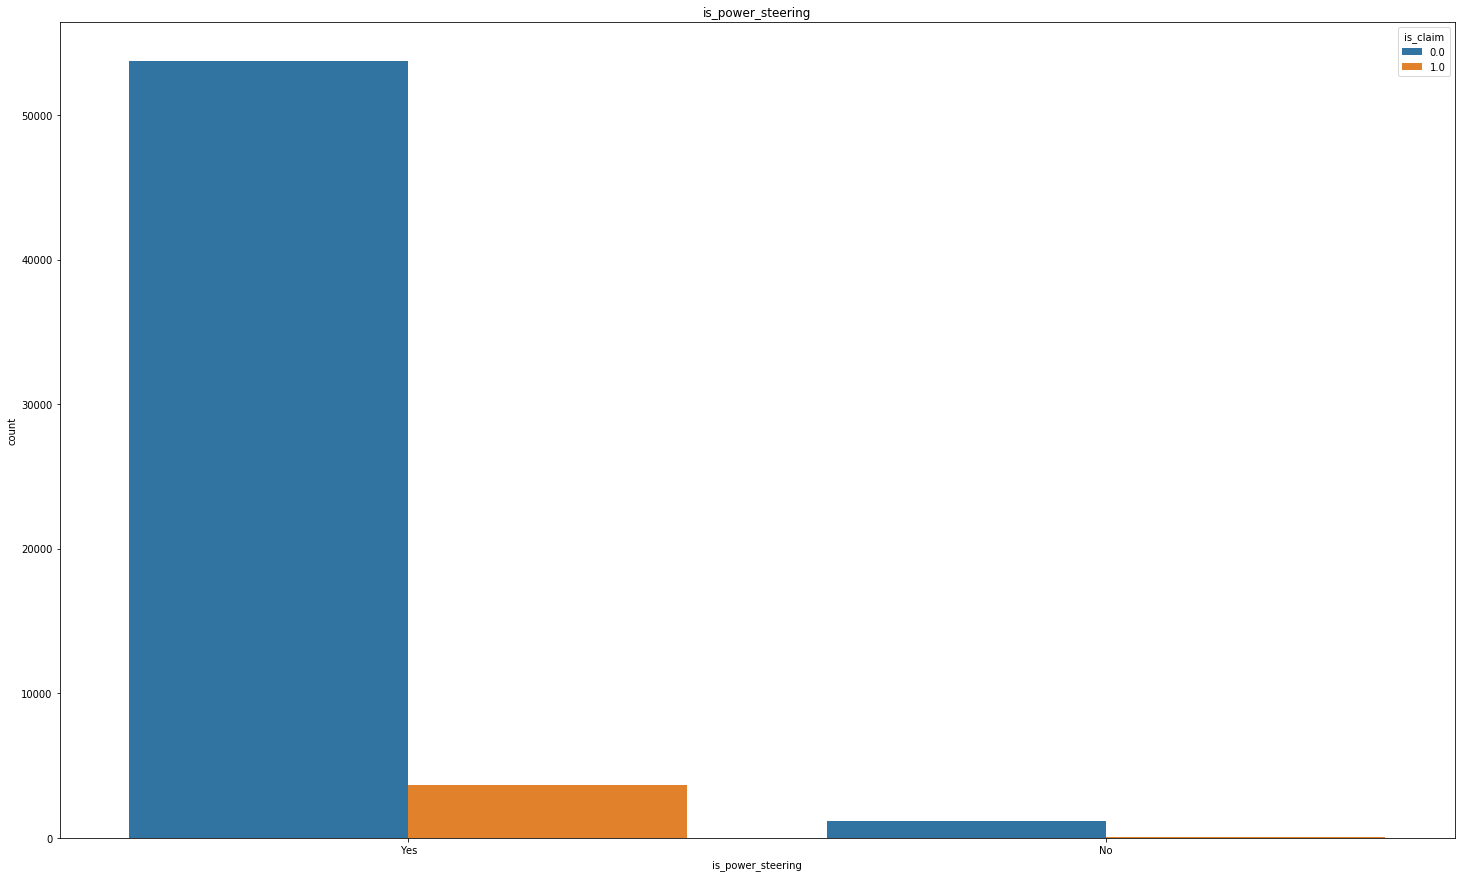

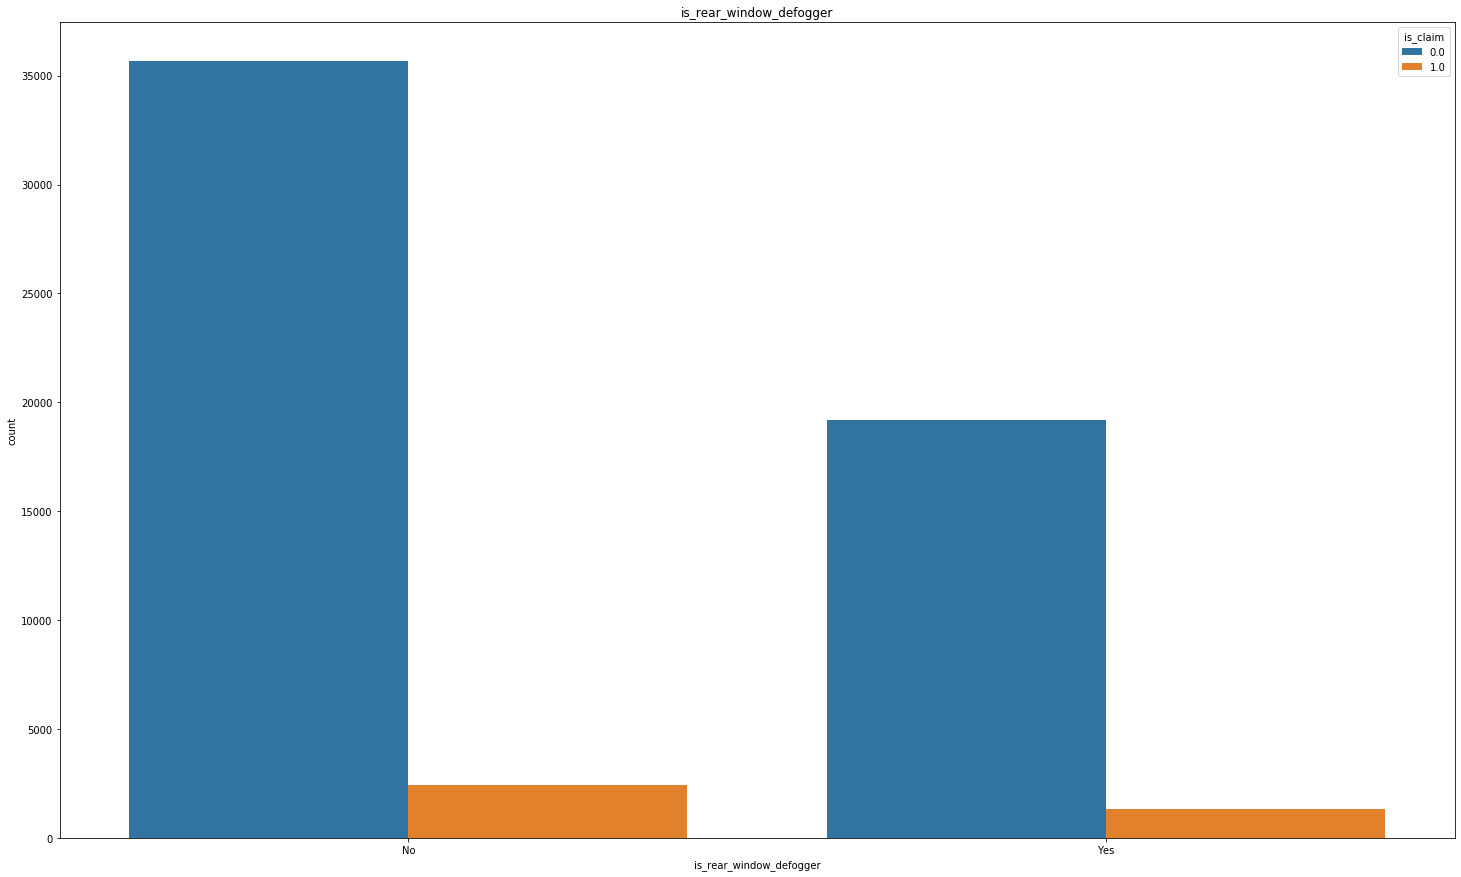

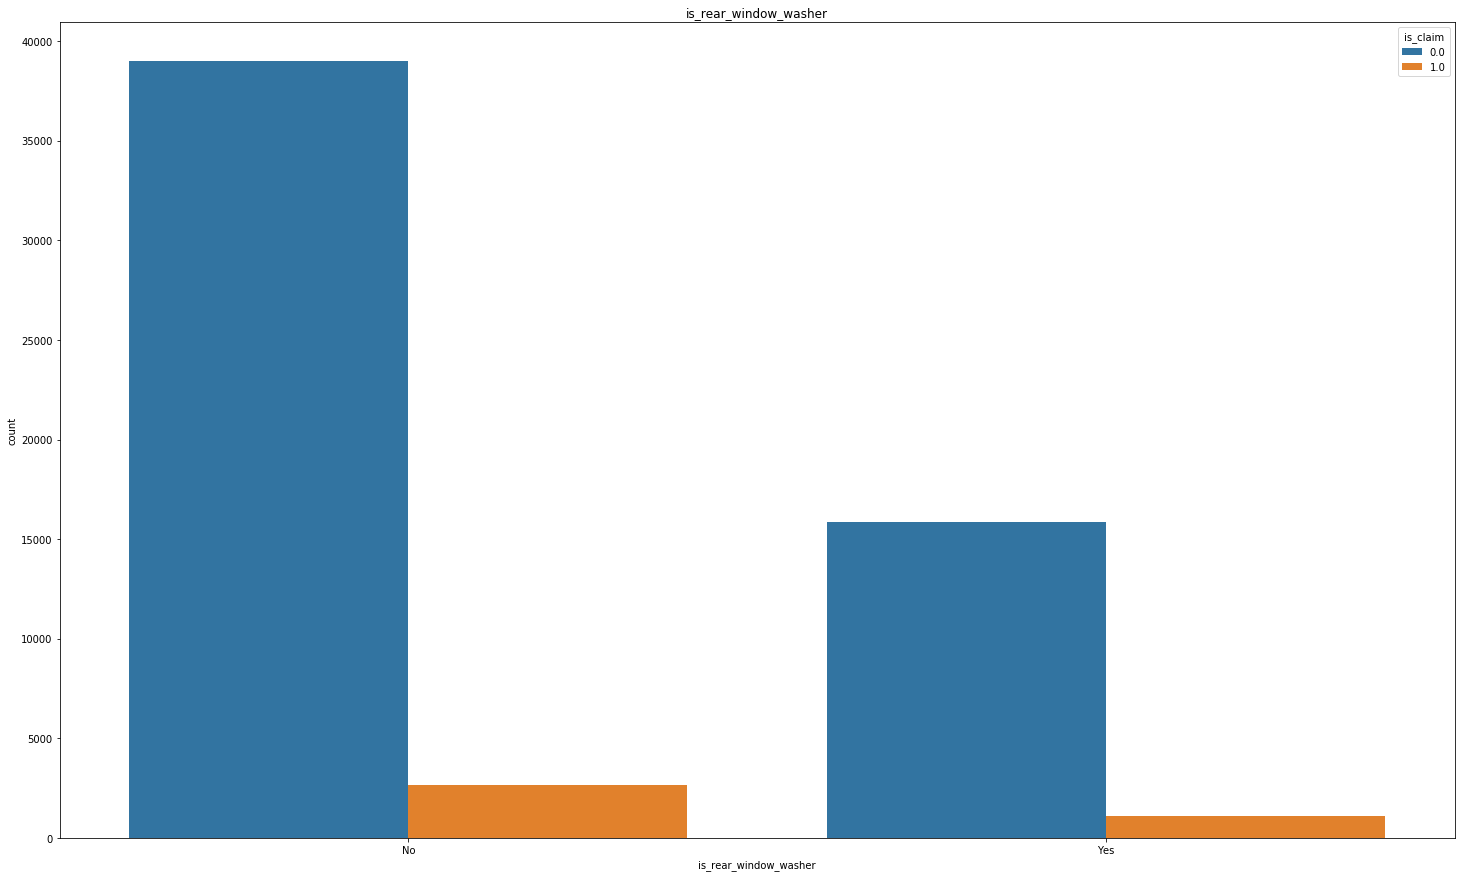

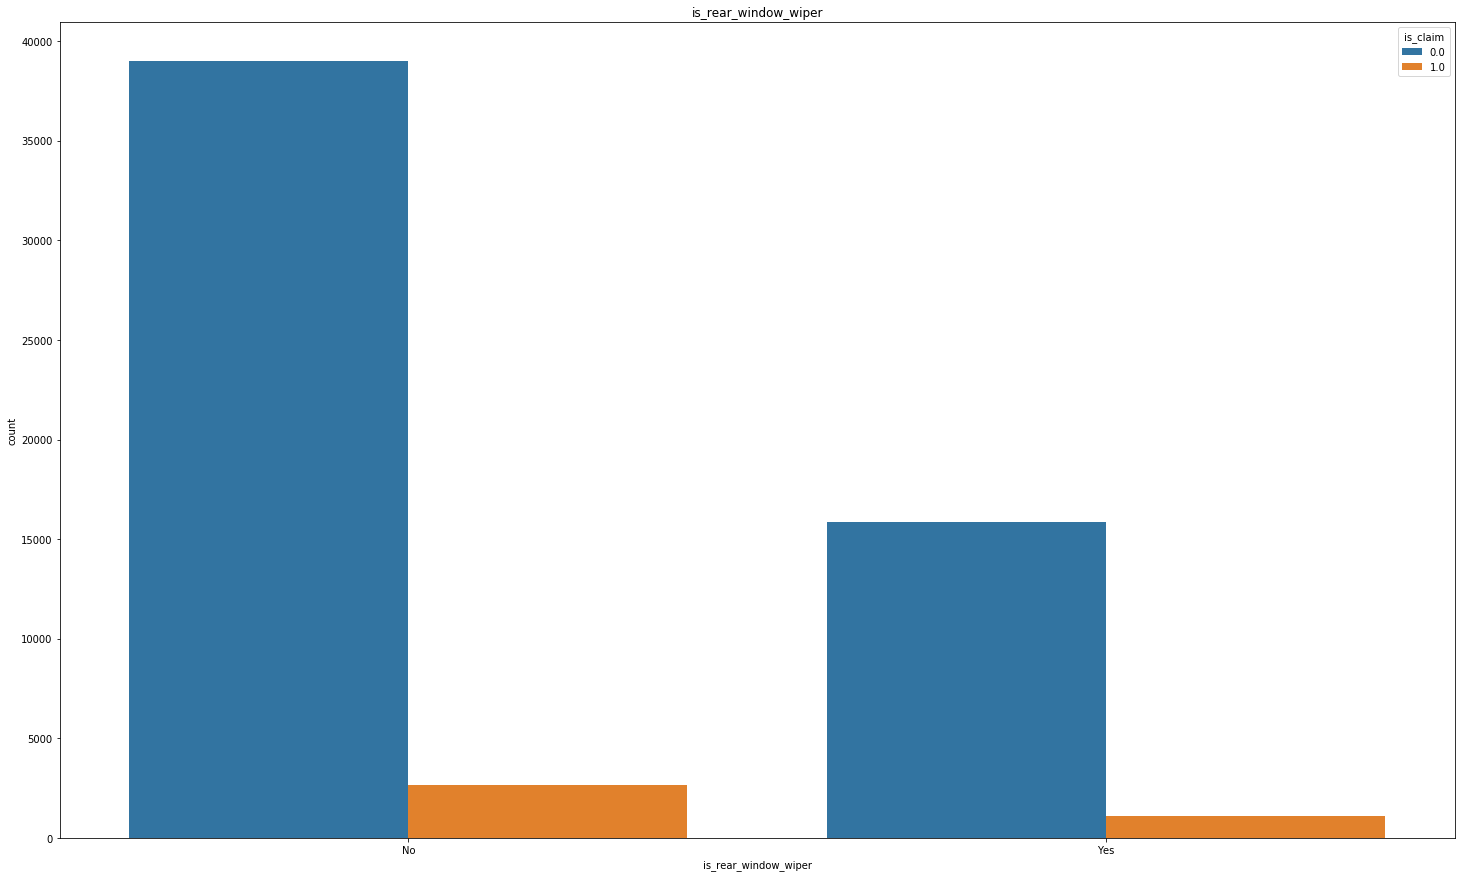

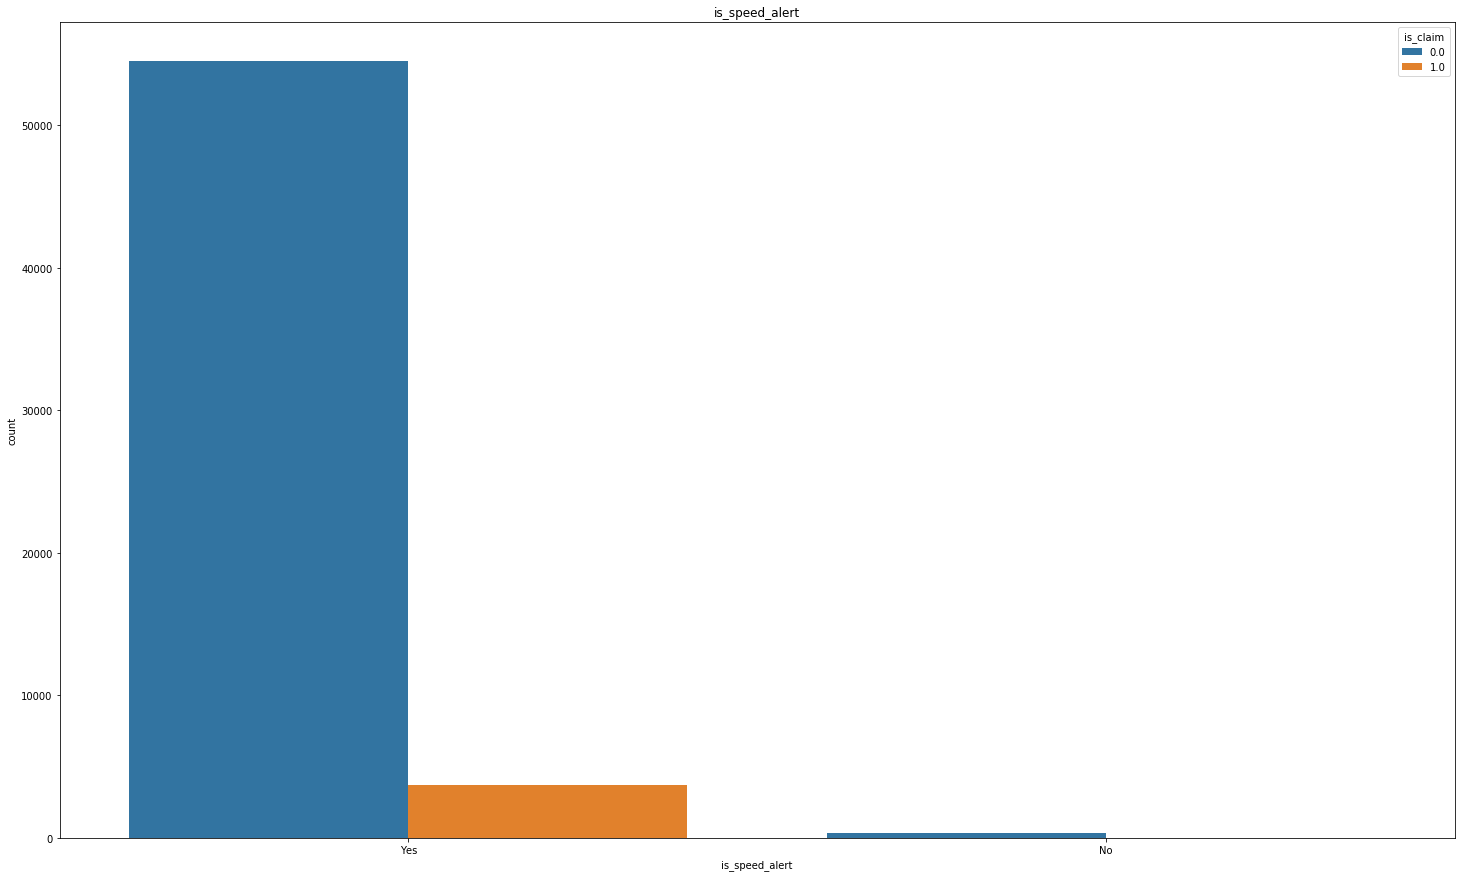

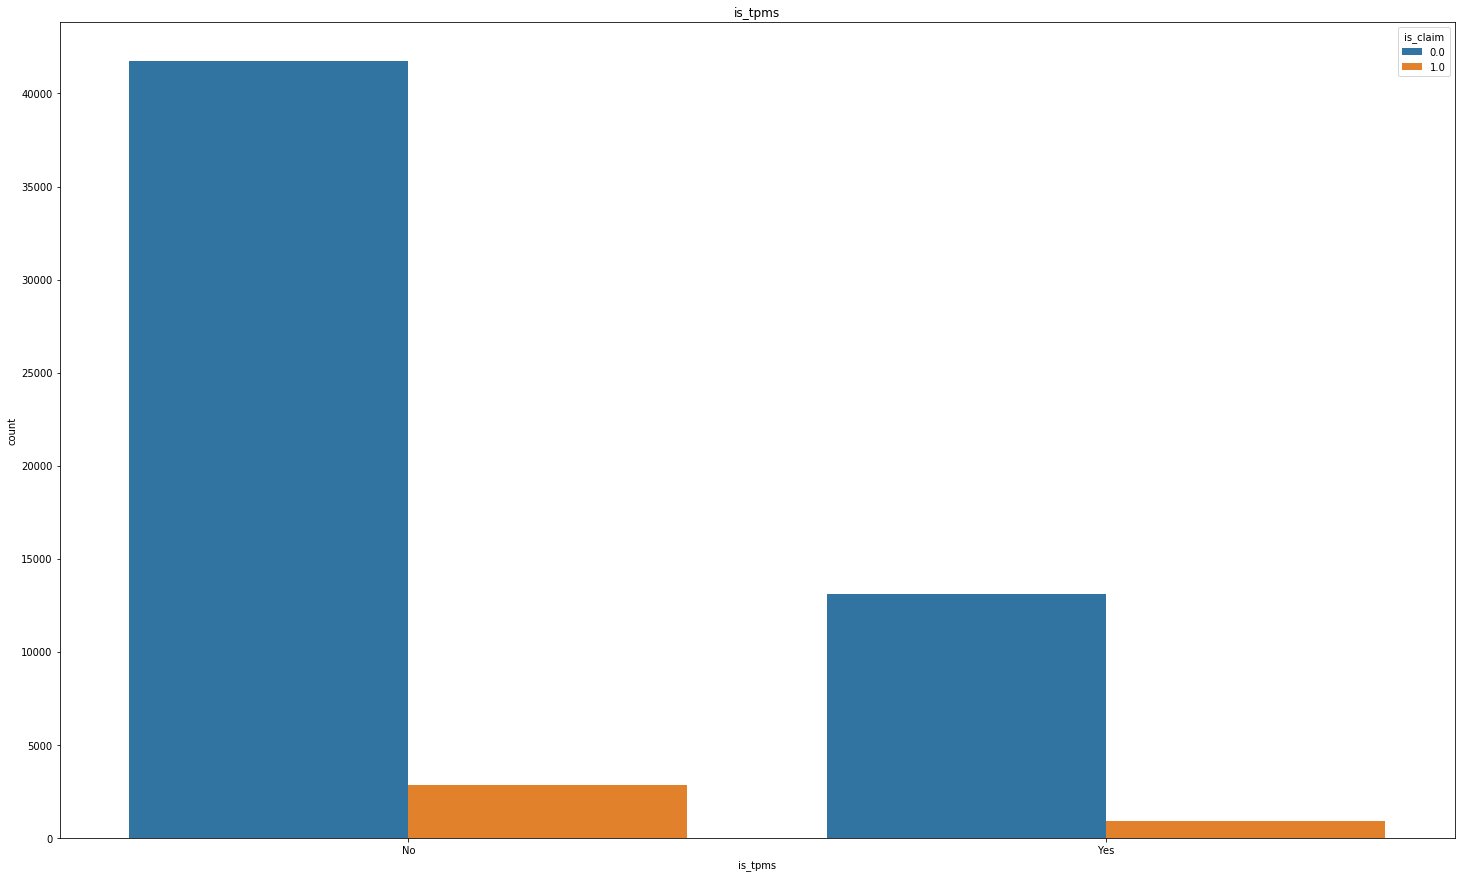

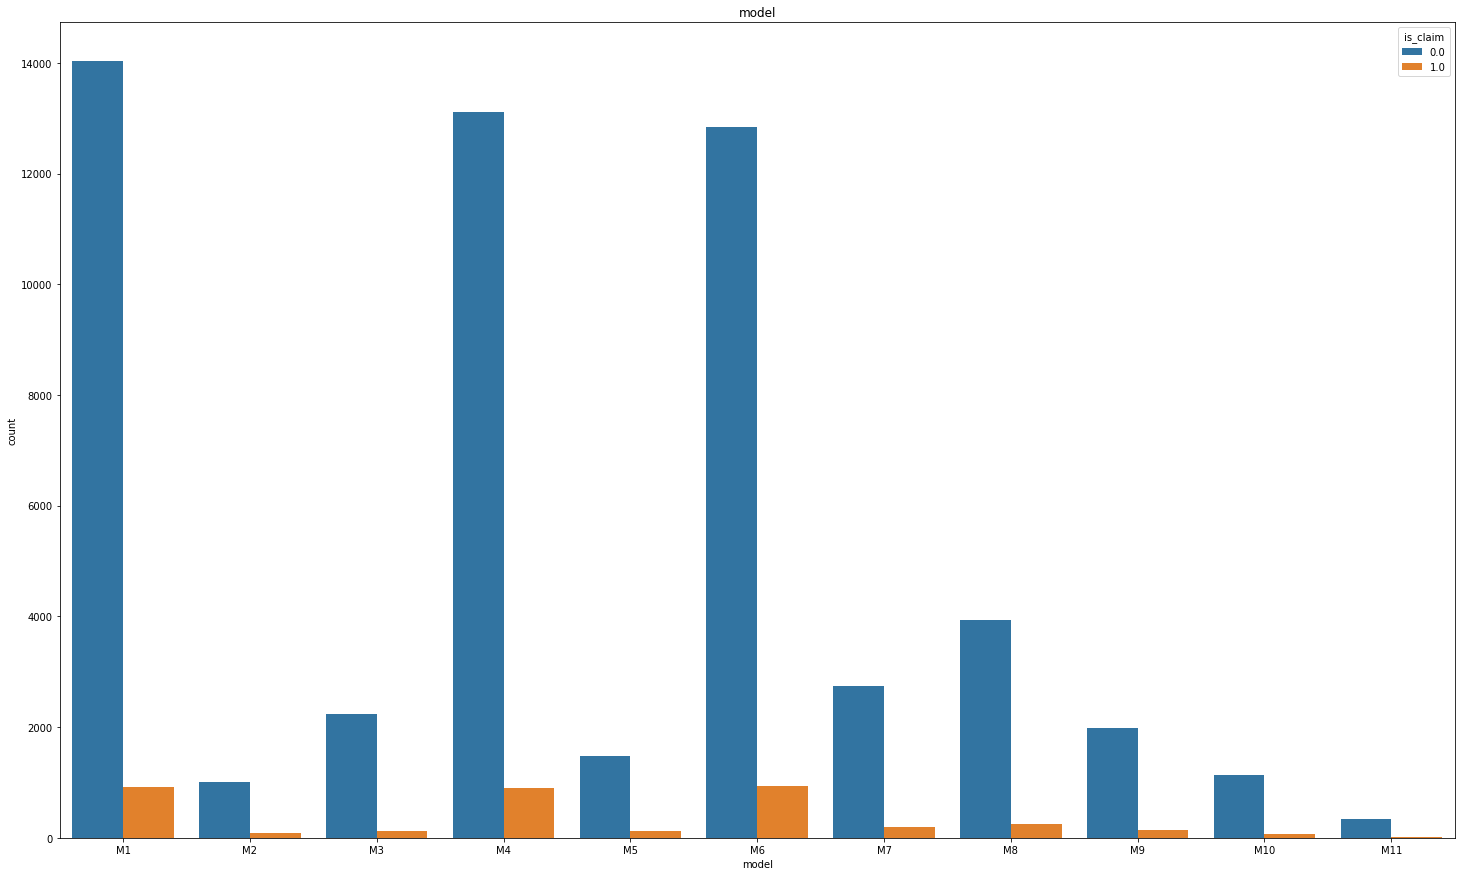

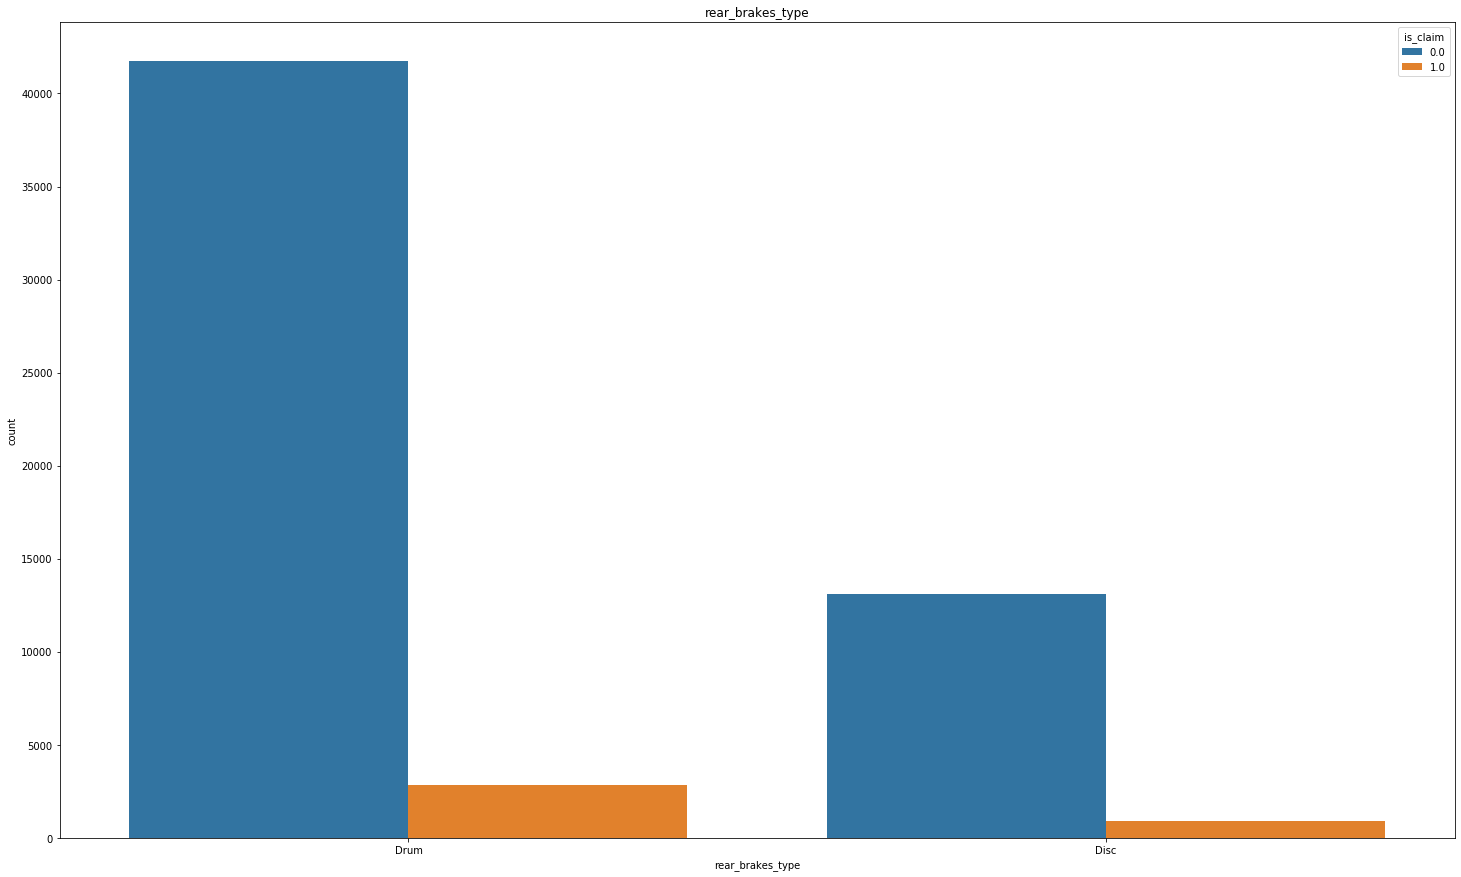

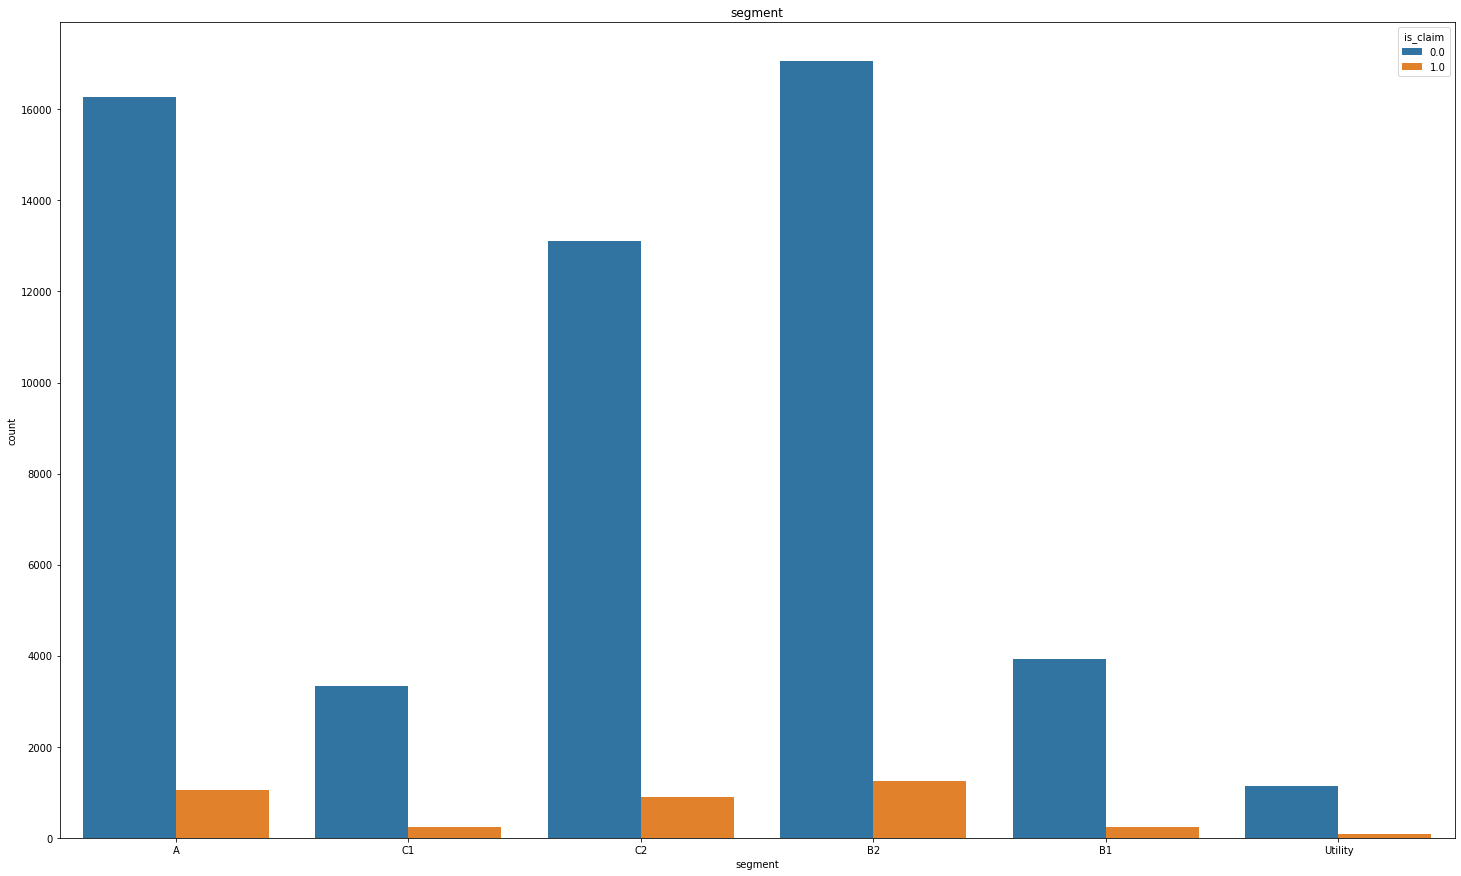

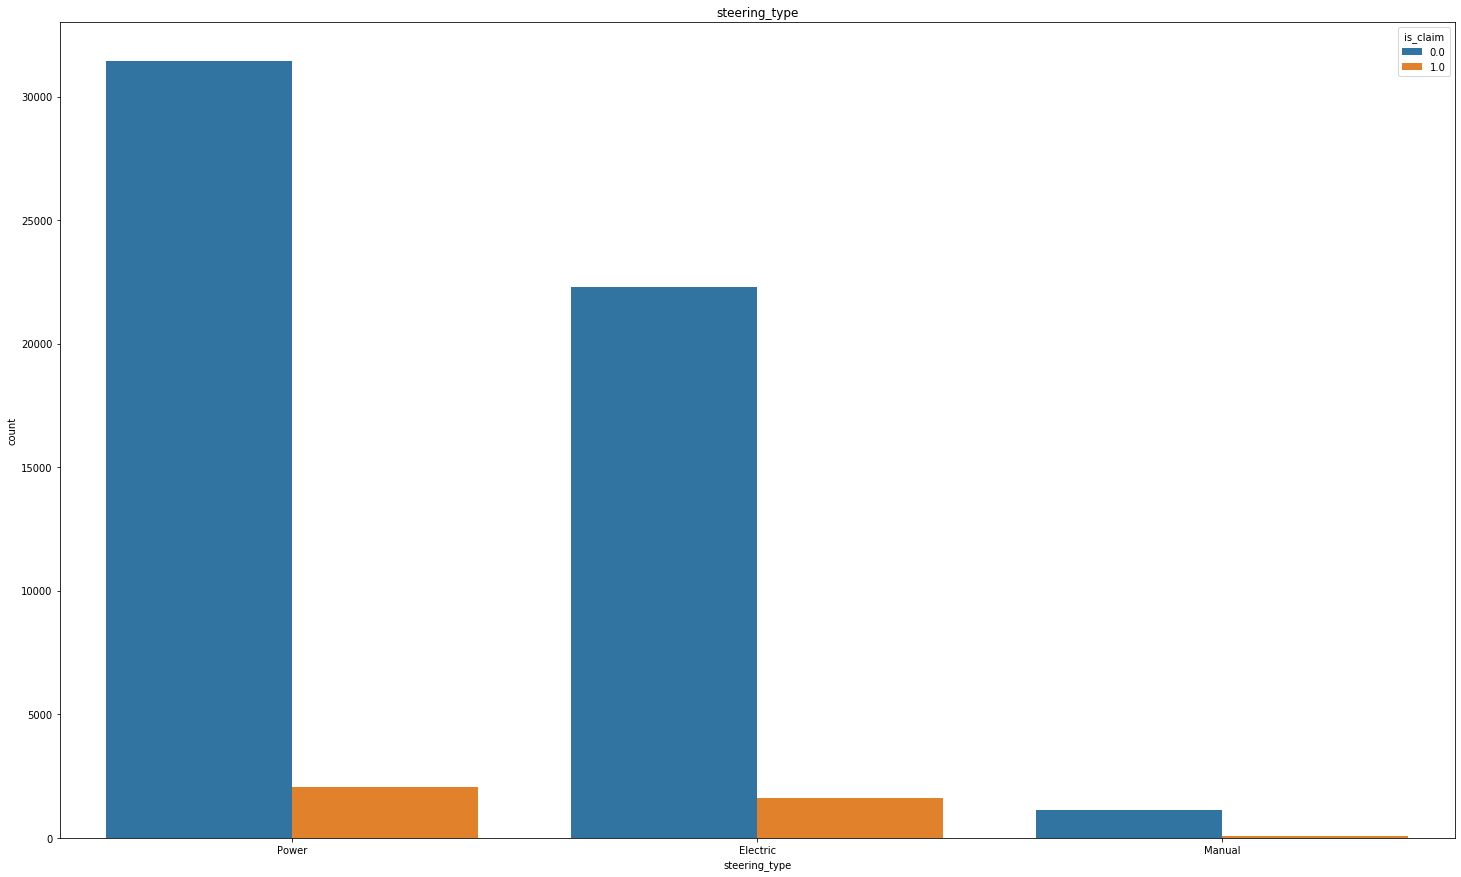

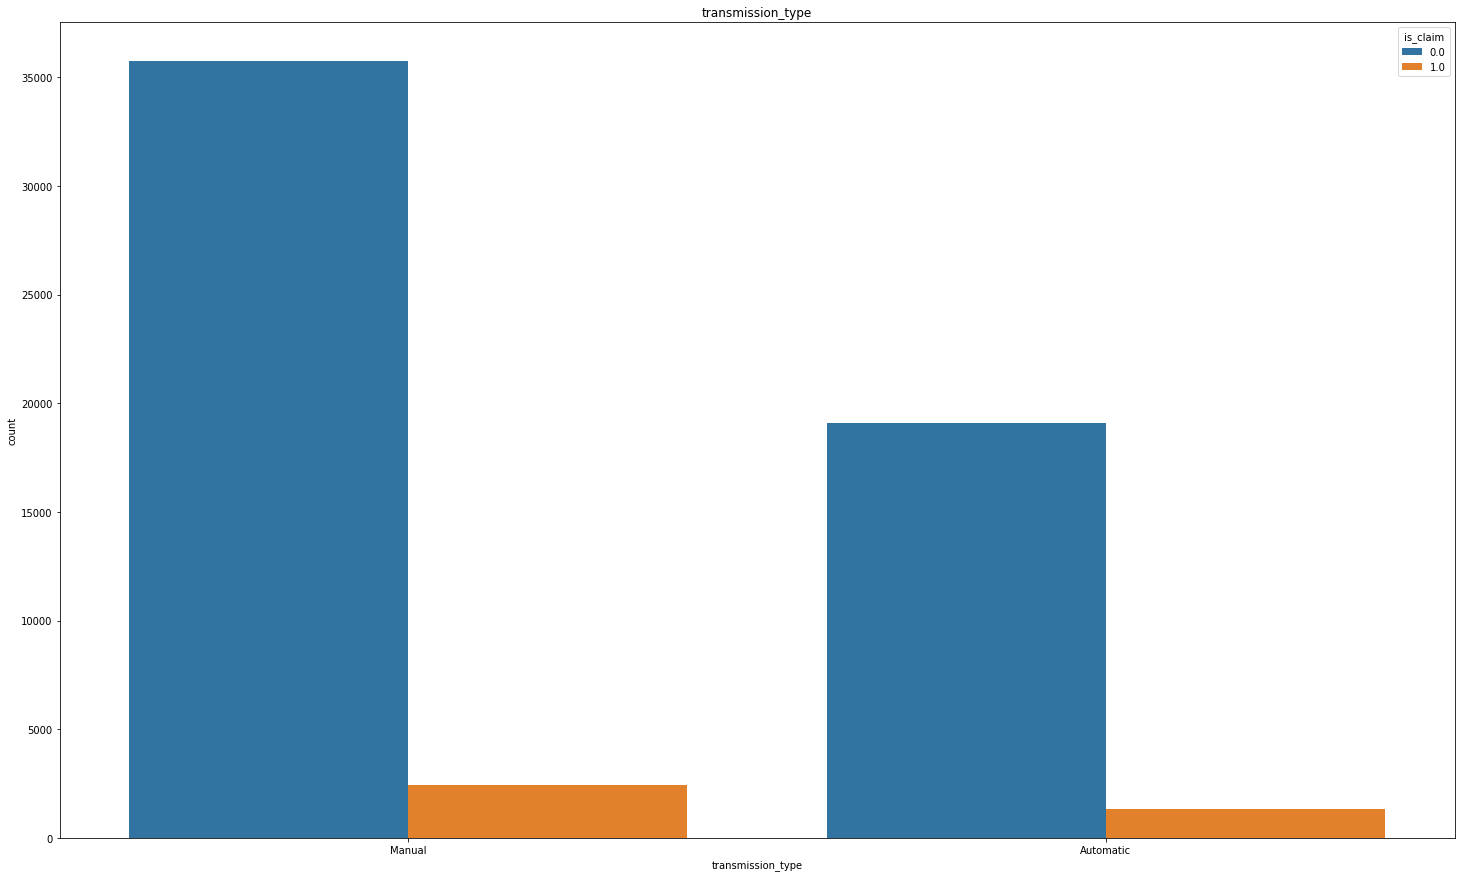

In [35]:
# Cat vs Cat
for i in cat_cols[:-1]:
    sns.countplot(combined.loc[:, i], 
                  hue = combined.is_claim)
    plt.title(i)
    plt.show()
    
# C8 is the area cluster from where most of the claims emerge.
# K Series Dual Jet Engine, No parking camera
# Model M6, B2 Segment, Drum Brakes are some of the components
# bringing claims to the doors of Insurance company.

### Feature Engineering & Statistical Feature Selection

In [14]:
combined.head(2)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0.0


In [15]:
for i in combined.columns:
    if i.startswith('is') &(i!= 'is_claim'):
        mapp ={'Yes':1,'No':0}
        combined[i] = combined[i].map(mapp)

In [16]:
# Torque and bhp
combined[["bhp", "rpm_power"]] = combined.max_power.str.split("@", expand = True)

In [72]:
#combined.rename(columns = {"rpm_torque":"rpm_power"}, inplace = True)

In [17]:
combined[["Nm", "rpm_torque"]] = combined.max_torque.str.split("@", expand = True)

In [18]:
combined.head(1)

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,Nm,rpm_torque
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36bhp,6000rpm,60Nm,3500rpm


In [19]:
# remove bhp and rpm from the cols
combined["bhp"]= combined["bhp"].apply(lambda x: float(x[:-3]))
combined["rpm_power"]= combined["rpm_power"].apply(lambda x: float(x[:-3]))
combined["rpm_torque"]= combined["rpm_torque"].apply(lambda x: float(x[:-3]))
combined["Nm"]= combined["Nm"].apply(lambda x: float(x[:-2]))

In [20]:
# weight per unit
# age  = age of the car/age of the policy holder
# per unit power = rpm_power/bhp
# per unit torque = rpm_torque/Nm
for i in [combined]:
    i["weight_per_unit"] = i["gross_weight"]/(i["height"]*i["width"]*i["length"])
    i["per_unit_power"] = i["rpm_power"]/i["bhp"]
    i["per_unit_torque"] = i["rpm_torque"]/i["Nm"]
    i["age"] = i["age_of_car"]/i["age_of_policyholder"]

In [21]:
# num cols and apply ttest
combined.select_dtypes(include=np.number).columns

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'make', 'airbags', 'is_esc',
       'is_adjustable_steering', 'is_tpms', 'is_parking_sensors',
       'is_parking_camera', 'displacement', 'cylinder', 'gear_box',
       'turning_radius', 'length', 'width', 'height', 'gross_weight',
       'is_front_fog_lights', 'is_rear_window_wiper', 'is_rear_window_washer',
       'is_rear_window_defogger', 'is_brake_assist', 'is_power_door_locks',
       'is_central_locking', 'is_power_steering',
       'is_driver_seat_height_adjustable', 'is_day_night_rear_view_mirror',
       'is_ecw', 'is_speed_alert', 'is_claim', 'bhp', 'rpm_power', 'Nm',
       'rpm_torque', 'weight_per_unit', 'per_unit_power', 'per_unit_torque',
       'age'],
      dtype='object')

In [22]:
num_cols = ['age_of_car', 'age_of_policyholder', 'gross_weight', 
            'height', 'length','policy_tenure',
            'population_density', 'turning_radius', 
            'width', 'bhp', 'rpm_power',
            'Nm', 'rpm_torque', 'weight_per_unit', 'per_unit_power',
            'per_unit_torque', 'age']
len(num_cols)
import scipy.stats as stats

signif_feats = []
for i in num_cols:
    zero = combined.loc[combined.is_claim==0, i]
    one = combined.loc[combined.is_claim==1, i]
    teststats, pvalue = stats.ttest_ind(zero, one)
    if pvalue<0.05:
        signif_feats.append(i)

print(signif_feats)

['age_of_car', 'age_of_policyholder', 'policy_tenure', 'population_density', 'width', 'age']


In [23]:
# Area Wise Count of Policy Issued
combined["magic1"] = combined.groupby("area_cluster")["policy_id"].transform('nunique')
# Avg Policy Tenure Basis Policy ID
combined["magic2"] = combined.groupby("policy_id")["policy_tenure"].transform('mean')
# Median Policy Tenure Basis Policy ID
combined["magic3"] = combined.groupby("policy_id")["policy_tenure"].transform('median')
# Min Policy Tenure Basis Policy ID
combined["magic4"] = combined.groupby("policy_id")["policy_tenure"].transform('min')
# Max Policy Tenure Basis Policy ID
combined["magic5"] = combined.groupby("policy_id")["policy_tenure"].transform('max')

In [24]:
combined.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,Nm,rpm_torque,weight_per_unit,per_unit_power,per_unit_torque,age,magic1,magic2,magic3,magic4,magic5
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.077612,2473,0.515874,0.515874,0.515874,0.515874
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.053333,12158,0.672619,0.672619,0.672619,0.672619
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.052000,10172,0.841110,0.841110,0.841110,0.841110
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,88.50,6000.0,113.0,4400.0,1.271313e-07,67.796610,38.938053,0.254222,1112,0.900277,0.900277,0.900277,0.900277
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,67.06,5500.0,91.0,4250.0,1.315795e-07,82.016105,46.703297,0.173333,11683,0.596403,0.596403,0.596403,0.596403


In [25]:
# Split the Data in Train and Test
newtrain = combined.loc[0:train.shape[0]-1, :]
newtest = combined.loc[train.shape[0]:, :]

newtrain.shape, newtest.shape, train.shape, test.shape

((58592, 57), (39063, 57), (58592, 44), (39063, 43))

In [26]:
# Dropping target from newtest
newtrain.drop(["policy_id", "max_power", "max_torque"], axis =1, 
              inplace = True)
newtest.drop(["policy_id", "max_power", "max_torque", "is_claim"], axis =1, 
              inplace = True)

In [27]:
newtrain.shape, newtest.shape

((58592, 54), (39063, 53))

In [28]:
newtrain.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim,bhp,rpm_power,Nm,rpm_torque,weight_per_unit,per_unit_power,per_unit_torque,age,magic1,magic2,magic3,magic4,magic5
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.077612,2473,0.515874,0.515874,0.515874,0.515874
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.053333,12158,0.672619,0.672619,0.672619,0.672619
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,F8D Petrol Engine,2,0,0,0,1,0,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0,0.0,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.052000,10172,0.841110,0.841110,0.841110,0.841110
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,1.2 L K12N Dualjet,2,1,1,0,1,1,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,2,0.0,88.50,6000.0,113.0,4400.0,1.271313e-07,67.796610,38.938053,0.254222,1112,0.900277,0.900277,0.900277,0.900277
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,1.0 SCe,2,0,0,0,0,1,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,2,0.0,67.06,5500.0,91.0,4250.0,1.315795e-07,82.016105,46.703297,0.173333,11683,0.596403,0.596403,0.596403,0.596403


In [29]:
steer = {"Manual":1, "Power":2, "Electric":3}
trans ={"Automatic":2, "Manual":1}

newtrain["transmission_type"] = newtrain.transmission_type.map(trans)
newtrain["steering_type"] = newtrain.steering_type.map(steer)

In [30]:
newtest["transmission_type"] = newtest.transmission_type.map(trans)
newtest["steering_type"] = newtest.steering_type.map(steer)

In [31]:
# Categorical Target Encoding
import category_encoders as ce

In [32]:
# Target Encoding
#  import category_encoders as ce

cat_cols = ['area_cluster', 'segment', 'model', 'fuel_type',
            'engine_type', 'rear_brakes_type', 'ncap_rating']
tgt_encoder = ce.TargetEncoder(cols=cat_cols)

X = newtrain.drop("is_claim", axis = 1)
y = newtrain["is_claim"]

newx = tgt_encoder.fit_transform(X, y)
newtest = tgt_encoder.transform(newtest)

In [33]:
newx.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,bhp,rpm_power,Nm,rpm_torque,weight_per_unit,per_unit_power,per_unit_torque,age,magic1,magic2,magic3,magic4,magic5
0,0.515874,0.05,0.644231,0.051771,4990,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,1,5,2,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.077612,2473,0.515874,0.515874,0.515874,0.515874
1,0.672619,0.02,0.375000,0.070825,27003,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,1,5,2,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.053333,12158,0.672619,0.672619,0.672619,0.672619
2,0.841110,0.02,0.384615,0.070972,4076,1,0.060389,0.061413,0.060748,0.061413,2,0,0,0,1,0,0.063871,796,3,1,5,2,4.6,3445,1515,1475,1185,0,0,0,0,0,0,0,1,0,0,0,1,0.062418,40.36,6000.0,60.0,3500.0,1.539304e-07,148.662042,58.333333,0.052000,10172,0.841110,0.841110,0.841110,0.841110
3,0.900277,0.11,0.432692,0.076692,21622,1,0.064099,0.074074,0.066384,0.074074,2,1,1,0,1,1,0.063871,1197,4,2,5,3,4.8,3995,1735,1515,1335,1,0,0,1,1,1,1,1,1,1,1,1,0.064994,88.50,6000.0,113.0,4400.0,1.271313e-07,67.796610,38.938053,0.254222,1112,0.900277,0.900277,0.900277,0.900277
4,0.596403,0.11,0.634615,0.057745,34738,2,0.060389,0.053940,0.066384,0.053940,2,0,0,0,0,1,0.063871,999,3,2,5,3,5.0,3731,1579,1490,1155,0,0,0,0,0,1,1,1,0,1,1,1,0.064994,67.06,5500.0,91.0,4250.0,1.315795e-07,82.016105,46.703297,0.173333,11683,0.596403,0.596403,0.596403,0.596403


In [34]:
# Apply Standard Scaler
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

newx.select_dtypes(include=np.number).columns

cols = ['policy_tenure', 'population_density', 'displacement',
       'turning_radius', 'length', 'width', 'height',
       'gross_weight','bhp', 'rpm_power', 'Nm',
       'rpm_torque', 'weight_per_unit', 'per_unit_power', 
        'per_unit_torque', 'magic1', 'magic2', 'magic3', 'magic4', 'magic5']

for i in cols:
    newx.loc[:, i] = sc.fit_transform(pd.DataFrame(newx.loc[:, i]))
    newtest.loc[:, i] = sc.transform(pd.DataFrame(newtest.loc[:, i]))

In [45]:
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)
for train_index, test_index in kfold.split(smotex, smotey):
    for name, model in models.items():
        xtrain = smotex.loc[train_index]
        ytrain = smotey.loc[train_index]
        print(xtrain.shape, ytrain.shape)

(87750, 53) (87750,)
(87750, 53) (87750,)
(87750, 53) (87750,)
(87750, 53) (87750,)
(87750, 53) (87750,)
(87750, 53) (87750,)
(87751, 53) (87751,)
(87751, 53) (87751,)
(87751, 53) (87751,)
(87751, 53) (87751,)


In [45]:
# Evaluate the Model...
from sklearn.model_selection import StratifiedKFold, cross_val_score

def eval_models(model):
    cv = StratifiedKFold(n_splits=10, shuffle = True, 
                         random_state = 42)
    scores = cross_val_score(model, newx, y,
                            scoring = "f1", cv = cv, 
                             error_score="raise",
                            n_jobs = -1)
    return scores

In [49]:
# Build the Models....
models = base_models()
# List for result and model names
result, names = list(), list()
for name, model in models.items():
    scores = eval_models(model)
    result.append(scores) # this will save the f1 score
    names.append(name) # this will save the name of the model..
    print(">%s %.3f (%.3f)" % (name, 
          np.mean(scores), np.std(scores)))

>lg 0.000 (0.000)
>dtree 0.087 (0.016)
>rf 0.017 (0.008)
>etree 0.031 (0.009)
>adaboost 0.000 (0.000)
>gbm 0.000 (0.000)
>xgb 0.001 (0.002)
>lgbm 0.000 (0.000)


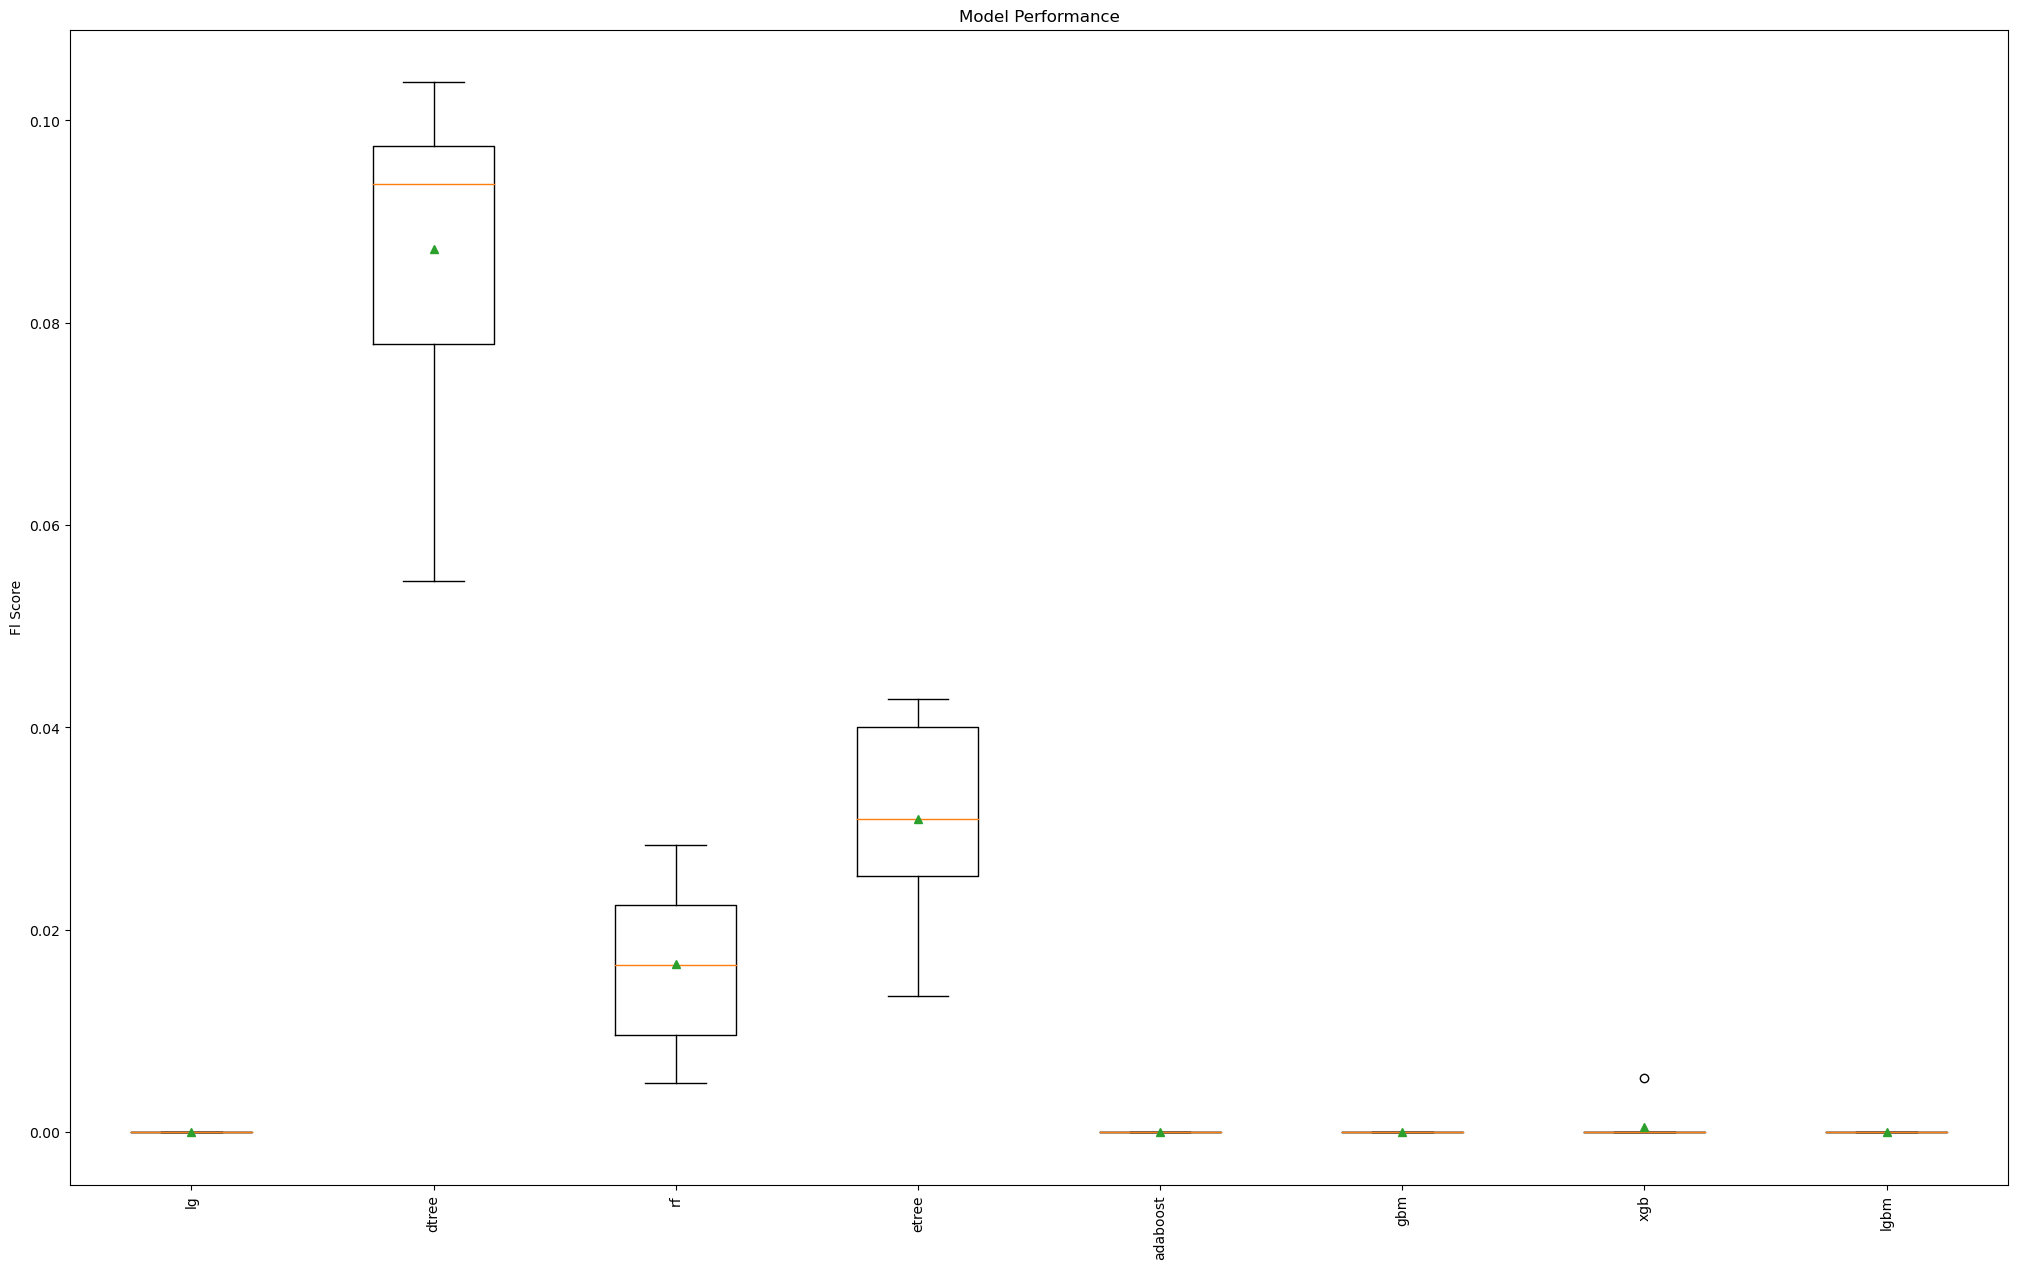

In [52]:
# Plotting the Output
plt.boxplot(result, labels = names, showmeans = True)
plt.xticks(rotation = 90)
plt.ylabel("Fl Score")
plt.title("Model Performance")
plt.show()

### Smote for handling Imbalance

In [56]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
smotex, smotey = smote.fit_resample(newx, y)

In [57]:
# List of Models
def base_models():
    models = dict()
    models["lg"] = LogisticRegression()
    models["dtree"] = DecisionTreeClassifier()
    models["rf"] = RandomForestClassifier()
    models["etree"] = ExtraTreesClassifier()
    models["adaboost"] = AdaBoostClassifier()
    models["gbm"] = GradientBoostingClassifier()
    models["xgb"] = XGBClassifier()
    models["lgbm"] = LGBMClassifier()
    return models

In [59]:
def eval_models(model):
    cv = StratifiedKFold(n_splits=10, shuffle = True, 
                         random_state = 42)
    scores = cross_val_score(model, smotex, smotey,
                            scoring = "f1", cv = cv, 
                             error_score="raise",
                            n_jobs = -1)
    return scores

In [60]:
# Build the Models....
models = base_models()
# List for result and model names
result, names = list(), list()
for name, model in models.items():
    scores = eval_models(model)
    result.append(scores) # this will save the f1 score
    names.append(name) # this will save the name of the model..
    print(">%s %.3f (%.3f)" % (name, 
          np.mean(scores), np.std(scores)))

>lg 0.588 (0.008)
>dtree 0.918 (0.003)
>rf 0.934 (0.003)
>etree 0.934 (0.002)
>adaboost 0.722 (0.004)
>gbm 0.879 (0.010)
>xgb 0.960 (0.003)
>lgbm 0.953 (0.003)


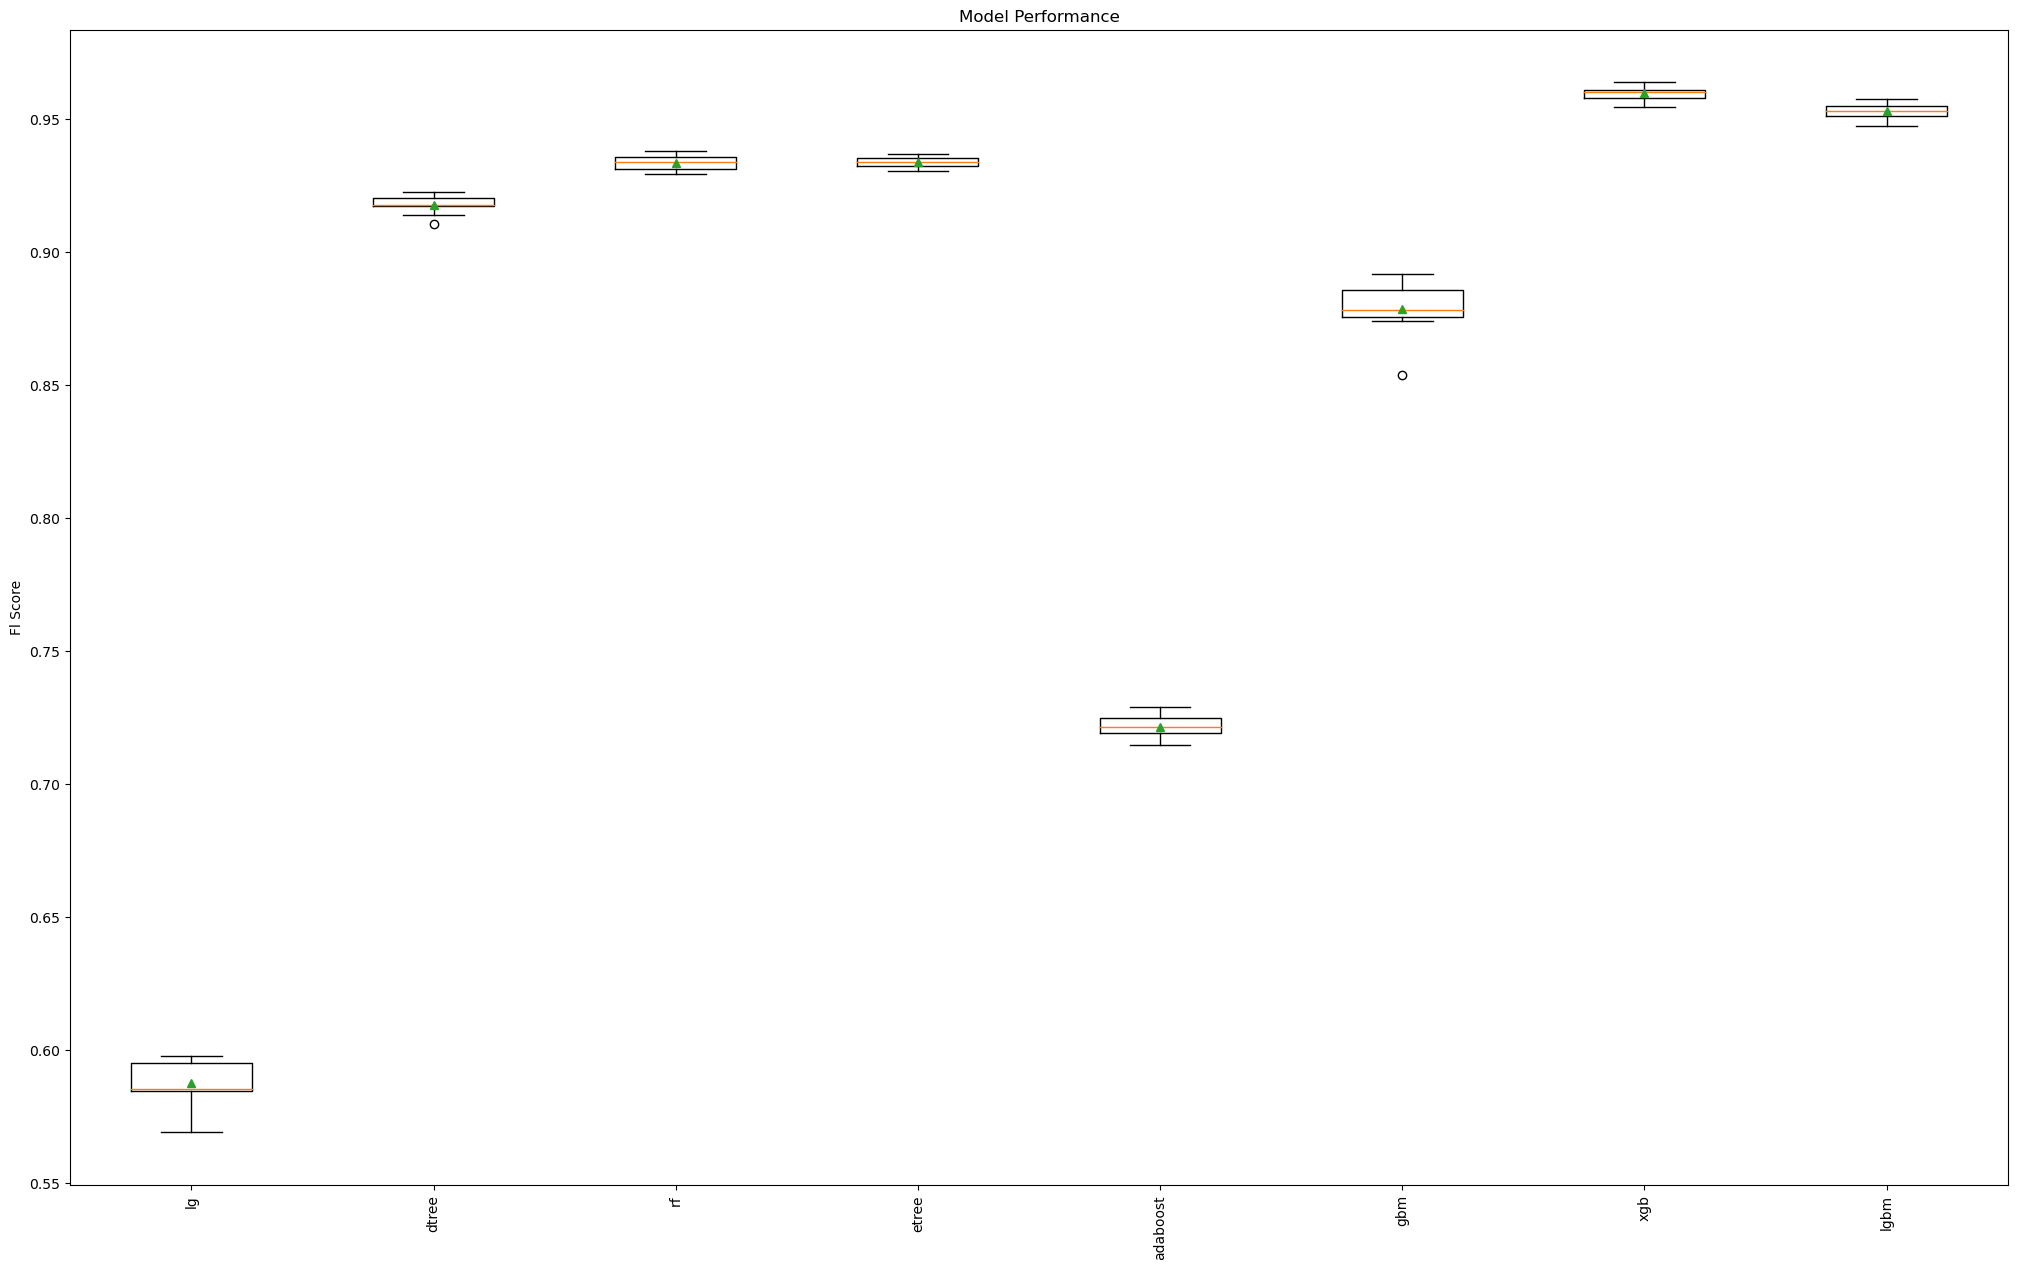

In [61]:
# Plotting the Output
plt.boxplot(result, labels = names, showmeans = True)
plt.xticks(rotation = 90)
plt.ylabel("Fl Score")
plt.title("Model Performance")
plt.show()

### Smote

In [35]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
smotex, smotey = smote.fit_resample(newx, y)

### Modelling

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# List of Models
def base_models():
    models = dict()
    models["lg"] = LogisticRegression()
    models["dtree"] = DecisionTreeClassifier()
    models["rf"] = RandomForestClassifier()
    models["etree"] = ExtraTreesClassifier()
    models["adaboost"] = AdaBoostClassifier()
    models["gbm"] = GradientBoostingClassifier()
    models["xgb"] = XGBClassifier(scale_pos_weight = 10)
    models["lgbm"] = LGBMClassifier()
    models["cboost"] = CatBoostClassifier(scale_pos_weight = 10)
    return models


In [37]:
sub = pd.DataFrame({"policy_id":test.policy_id,"is_claim":0})

In [42]:
models = base_models()

from sklearn.model_selection import KFold

pred = []
kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)
for train_index, test_index in kfold.split(smotex, smotey):
    for name, model in models.items():
        xtrain = smotex.loc[train_index]
        ytrain = smotey.loc[train_index]
        pred.append(model.fit(xtrain, ytrain).predict(newtest))
        finalpred = pd.DataFrame(pred).T.mode(axis = 1)[0]
        sub["is_claim"]=finalpred
        sub.to_csv("Insurance_"+name+".csv", index = False)

Learning rate set to 0.069615
0:	learn: 0.6281037	total: 25ms	remaining: 25s
1:	learn: 0.5741028	total: 41.2ms	remaining: 20.6s
2:	learn: 0.5294387	total: 62.1ms	remaining: 20.6s
3:	learn: 0.4933134	total: 81.3ms	remaining: 20.3s
4:	learn: 0.4608953	total: 97.4ms	remaining: 19.4s
5:	learn: 0.4337022	total: 114ms	remaining: 18.9s
6:	learn: 0.4117014	total: 138ms	remaining: 19.6s
7:	learn: 0.3935098	total: 156ms	remaining: 19.3s
8:	learn: 0.3789748	total: 171ms	remaining: 18.8s
9:	learn: 0.3664287	total: 183ms	remaining: 18.1s
10:	learn: 0.3550545	total: 197ms	remaining: 17.7s
11:	learn: 0.3454228	total: 209ms	remaining: 17.2s
12:	learn: 0.3374812	total: 223ms	remaining: 16.9s
13:	learn: 0.3305451	total: 236ms	remaining: 16.6s
14:	learn: 0.3245483	total: 250ms	remaining: 16.4s
15:	learn: 0.3192727	total: 264ms	remaining: 16.3s
16:	learn: 0.3146578	total: 279ms	remaining: 16.1s
17:	learn: 0.3107009	total: 294ms	remaining: 16s
18:	learn: 0.3070818	total: 308ms	remaining: 15.9s
19:	learn: 0

KeyboardInterrupt: 

* Catboost: 0.1639
* XGBClassifier: 0.16
* Logistic Regresion: 0.1513
* Adaboost Regressor: 0.1122
* Random Forest: 0.1055
* Decision Tree: 0.0878
* ExtraTreesRegressor: 0.0997
* Gradient Boosting: 0.0973
* LGBM Classifier: 0.04